# EMPLOYEE SATISFACTION PREDICTION

## Importing libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")

importing the dataset and also defining missing values for easy data manipulation

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]

df = pd.read_csv('Employee_Attrition.csv', na_values = missing_value_formats)

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,...,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,...,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,...,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,...,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,...,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,37.421699,No,Travel_Frequently,914.061807,Research & Development,21.647903,NaN,Medical,0.950166,2142.083554,3.171444,Male,NaN,3.372679,1.993840,Laboratory Technician,4.169226,Married,2806.950012,13077.116879,4.081321,Y,No,17.915157,2.968558,3.020184,85.835352,0.962354,NaN,3.451951,2.819336,5.436125,2.021736,0.000000,NaN
1466,34.957777,No,NaN,574.675152,Research & Development,6.027683,1.122961,Medical,1.064563,2221.578902,4.284094,Male,39.842324,2.038727,2.532482,Healthcare Representative,NaN,Married,NaN,21026.154051,NaN,Y,No,14.692325,2.800889,1.014690,94.868401,0.923291,NaN,5.122188,2.560634,7.428423,7.504109,0.860105,6.756705
1467,26.884296,No,Travel_Rarely,151.506083,Research & Development,NaN,3.478895,Life Sciences,0.960908,NaN,2.152282,Male,91.603642,4.394863,1.964613,Manufacturing Director,2.152039,Married,6609.842365,NaN,1.017623,Y,Yes,18.744411,NaN,1.952083,93.310094,1.096556,6.278564,0.000000,2.587121,5.965205,1.822679,0.000000,3.271091
1468,NaN,No,Travel_Frequently,995.977086,Human Resources,2.094496,2.956093,Medical,0.873312,2086.654641,4.095580,Male,59.110216,2.019760,1.925025,Sales Executive,NaN,Married,5585.302599,11837.891371,1.591695,NaN,No,12.930373,3.221402,4.182100,83.920873,0.000000,15.235372,3.338546,1.989767,7.738712,6.562611,0.000000,NaN
1469,38.133892,No,Travel_Rarely,703.677110,Research & Development,7.231661,3.292684,Medical,1.061133,NaN,1.738502,Male,67.262829,4.478969,2.291543,Laboratory Technician,2.875309,Married,5188.877974,10276.024987,2.364262,Y,No,10.343964,3.053256,1.076817,82.610288,0.000000,6.493763,3.451604,4.376818,3.755110,3.308961,1.070952,2.025939


In [7]:
df.shape

(1470, 35)

In [8]:
df.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber              float64
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               float64
StockOptionLevel            

In [9]:
print(df.isnull().sum())

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Descriptive Statistics

In [11]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,2.715272,6544.718401,14364.334764,2.654394,15.295717,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,1.146786,4766.580903,7269.420895,2.508952,3.995702,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,0.724192,891.481007,1567.502382,0.000000,7.684723,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,1.846039,2961.844066,8138.576694,0.948843,12.195197,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,2.895032,4957.070475,14258.293365,1.708812,14.495151,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,3.676663,8268.002496,20322.279885,3.959710,17.745736,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,5.251277,22858.020388,32751.715800,10.855733,29.797261,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


Of note is the minimum age of 14years, but in the column for Over18 there is no value for less than 18, i will drop this roll as it contains false information

In [12]:
df['Age'].value_counts()

41.920786    1
32.688775    1
38.395508    1
41.646949    1
32.499464    1
            ..
36.833431    1
24.046276    1
19.885837    1
24.610604    1
38.133892    1
Name: Age, Length: 1323, dtype: int64

In [13]:
df['Over18'].value_counts()

Y    1323
Name: Over18, dtype: int64

In [14]:
df = df[df['Age'] >= 18]

In [15]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1316.0,36.742845,9.797167,18.067474,29.815171,34.973926,42.766712,69.402515
DailyRate,1191.0,804.838357,414.182397,86.828045,459.474176,786.519833,1135.807484,1784.394456
DistanceFromHome,1180.0,9.006930,8.116904,0.750112,2.134379,6.849582,13.066630,33.684424
Education,1185.0,2.930454,1.072133,0.770362,2.133307,3.016349,3.687860,6.285161
EmployeeCount,1182.0,0.999997,0.100435,0.628985,0.931277,0.999965,1.067947,1.290613
EmployeeNumber,1189.0,1015.022050,609.909762,1.054148,491.716632,1012.981609,1523.952983,2438.135966
EnvironmentSatisfaction,1183.0,2.717814,1.125366,0.759655,1.891849,2.870550,3.641882,5.254672
HourlyRate,1182.0,65.548284,21.335516,24.801995,47.593074,64.932222,82.974596,123.200439
JobInvolvement,1177.0,2.730793,0.747836,0.722008,2.175359,2.838575,3.161724,4.932014
JobLevel,1182.0,2.054880,1.126226,0.715172,1.043801,1.931168,2.634857,5.942269


In [16]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1183,1180,1179,1188,1185,1186,1185,1183,1185
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,946,797,733,457,704,253,537,1183,831


## Data Preparation

To be able to come up with a model to predict how the employees are satisfied with their jobs and working conditions i will use the variable 'Job Satisfaction' as the target variable for this analysis

In [17]:
df['JobSatisfaction'].value_counts()

3.397665    1
2.035514    1
2.344711    1
4.557414    1
2.845642    1
           ..
1.891621    1
1.733266    1
2.763829    1
4.539419    1
2.875309    1
Name: JobSatisfaction, Length: 1181, dtype: int64

In [18]:
df['JobSatisfaction'].unique()

array([3.39766519, 1.58405916, 3.30100886, ..., 4.16922558, 2.15203887,
       2.87530917])

to handle the missing data in the target variable i am going to just drop the missing values in the column, as imputation might introduce a bias to the machine learning models

In [19]:
df.dropna(subset=['JobSatisfaction'], inplace=True)

In [20]:
df. shape

(1181, 35)

remove some columns which have the same information, for example, daily rate, hourly rate monthly rate etc. and also columns with constant values for example StandardHours as these will not have an effect on the modelling for machine learning

In [21]:
to_remove = ['DailyRate', 'MonthlyIncome', 'MonthlyRate', 'EmployeeNumber', 'StandardHours', 'Over18', 'EmployeeCount']
df.drop(columns = to_remove, inplace=True)
df.shape

(1181, 28)

### renaming of columns

In [22]:
new_columns = {'BusinessTravel': 'travel', 'Department': 'dpt',
       'DistanceFromHome': 'distance', 'EducationField':'field', 
       'EmployeeNumber': 'ID', 'EnvironmentSatisfaction': 'environment', 'HourlyRate': 'rate',
       'JobInvolvement': 'involement', 'JobLevel': 'level', 'JobRole': 'role', 'JobSatisfaction': 'job',
       'MaritalStatus': 'marriage', 'NumCompaniesWorked': 'companies',
       'PercentSalaryHike': 'hike', 'PerformanceRating': 'rating',
       'RelationshipSatisfaction': 'rlation', 'StandardHours': 'hours', 'StockOptionLevel': 'stocks',
       'TotalWorkingYears': 'yrsworked', 'TrainingTimesLastYear': 'training', 'WorkLifeBalance': 'wlb',
       'YearsAtCompany': 'yrs', 'YearsInCurrentRole': 'yrsrole', 'YearsSinceLastPromotion': 'yrspromo',
       'YearsWithCurrManager': 'yrsmanager', 'EmployeeCount': 'count'}

df.rename(columns = new_columns, inplace=True)

In [23]:
df.columns

Index(['Age', 'Attrition', 'travel', 'dpt', 'distance', 'Education', 'field',
       'environment', 'Gender', 'rate', 'involement', 'level', 'role', 'job',
       'marriage', 'companies', 'OverTime', 'hike', 'rating', 'rlation',
       'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo',
       'yrsmanager'],
      dtype='object')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1181 non-null   float64
 1   Attrition    1059 non-null   object 
 2   travel       1056 non-null   object 
 3   dpt          1056 non-null   object 
 4   distance     1054 non-null   float64
 5   Education    1066 non-null   float64
 6   field        1062 non-null   object 
 7   environment  1062 non-null   float64
 8   Gender       1064 non-null   object 
 9   rate         1064 non-null   float64
 10  involement   1055 non-null   float64
 11  level        1057 non-null   float64
 12  role         1063 non-null   object 
 13  job          1181 non-null   float64
 14  marriage     1057 non-null   object 
 15  companies    1071 non-null   float64
 16  OverTime     1071 non-null   object 
 17  hike         1067 non-null   float64
 18  rating       1059 non-null   float64
 19  rlatio

In [25]:
unique_counts = df.nunique()

print(unique_counts)

Age            1181
Attrition         2
travel            3
dpt               3
distance       1054
Education      1066
field             6
environment    1062
Gender            2
rate           1064
involement     1055
level          1057
role              9
job            1181
marriage          3
companies       931
OverTime          2
hike           1067
rating         1059
rlation        1068
stocks          620
yrsworked      1058
training       1028
wlb            1061
yrs            1015
yrsrole         895
yrspromo        648
yrsmanager      876
dtype: int64


#### duplicate rows

In [26]:
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [Age, Attrition, travel, dpt, distance, Education, field, environment, Gender, rate, involement, level, role, job, marriage, companies, OverTime, hike, rating, rlation, stocks, yrsworked, training, wlb, yrs, yrsrole, yrspromo, yrsmanager]
Index: []


#### Missing Values

In [27]:
print(df.isnull().sum())

Age              0
Attrition      122
travel         125
dpt            125
distance       127
Education      115
field          119
environment    119
Gender         117
rate           117
involement     126
level          124
role           118
job              0
marriage       124
companies      110
OverTime       110
hike           114
rating         122
rlation        113
stocks         113
yrsworked      118
training       114
wlb            120
yrs            131
yrsrole        113
yrspromo       121
yrsmanager     113
dtype: int64


In [28]:
df_dropped = df.dropna()

In [29]:
df_dropped.shape

(80, 28)

- dropping null values for this dataset ends up with us loosing most of the data hence it is not the best method of handling missing values

- so for float values i will use the median to impute the values whereas for object values i will use the mode

In [30]:
float_columns = df.select_dtypes(include=['float']).columns

df[float_columns] = df[float_columns].apply(lambda x: x.fillna(x.median()))


In [31]:
object_columns = df.select_dtypes(include=['object']).columns

df[object_columns] = df[object_columns].apply(lambda x: x.fillna(x.mode()[0]))



In [32]:
print(df.isnull().sum())

Age            0
Attrition      0
travel         0
dpt            0
distance       0
Education      0
field          0
environment    0
Gender         0
rate           0
involement     0
level          0
role           0
job            0
marriage       0
companies      0
OverTime       0
hike           0
rating         0
rlation        0
stocks         0
yrsworked      0
training       0
wlb            0
yrs            0
yrsrole        0
yrspromo       0
yrsmanager     0
dtype: int64


#### Float Values

In [33]:
decimal_columns = df.select_dtypes(include=['float']).columns

print("Columns with decimal values:", list(decimal_columns))

Columns with decimal values: ['Age', 'distance', 'Education', 'environment', 'rate', 'involement', 'level', 'job', 'companies', 'hike', 'rating', 'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']


In [34]:
cols_roundoff = ['Age', 'Education', 'environment', 'involement', 'level', 'job', 'companies', 'rating', 'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']

cols_2f = ['distance', 'rate', 'hike']

In [35]:
df[cols_roundoff] = df[cols_roundoff].round().astype(int)

df[cols_2f] = df[cols_2f].round(2)

In [36]:
df.head()

,Age,Attrition,travel,dpt,distance,Education,field,environment,Gender,rate,involement,level,role,job,marriage,companies,OverTime,hike,rating,rlation,stocks,yrsworked,training,wlb,yrs,yrsrole,yrspromo,yrsmanager
0,42,Yes,Travel_Rarely,Sales,1.02,2,Life Sciences,2,Male,93.83,3,2,Sales Executive,3,Single,7,Yes,9.90,3,1,0,8,0,1,6,4,0,5
1,52,No,Travel_Frequently,Research & Development,6.85,1,Life Sciences,3,Male,52.30,2,2,Research Scientist,2,Married,1,No,14.49,4,4,1,9,3,3,10,8,1,6
2,33,Yes,Travel_Rarely,Research & Development,2.20,2,Other,4,Male,87.27,2,1,Laboratory Technician,3,Single,6,Yes,15.40,3,2,0,8,3,3,0,0,0,0
3,35,No,Travel_Frequently,Sales,2.94,4,Life Sciences,4,Female,56.38,3,1,Research Scientist,3,Married,1,Yes,9.76,3,3,0,8,3,3,8,6,3,0
4,25,No,Travel_Rarely,Research & Development,1.99,1,Medical,1,Male,40.43,3,1,Laboratory Technician,2,Married,10,No,11.92,3,3,1,6,3,3,2,2,2,2


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1181 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1181 non-null   int32  
 1   Attrition    1181 non-null   object 
 2   travel       1181 non-null   object 
 3   dpt          1181 non-null   object 
 4   distance     1181 non-null   float64
 5   Education    1181 non-null   int32  
 6   field        1181 non-null   object 
 7   environment  1181 non-null   int32  
 8   Gender       1181 non-null   object 
 9   rate         1181 non-null   float64
 10  involement   1181 non-null   int32  
 11  level        1181 non-null   int32  
 12  role         1181 non-null   object 
 13  job          1181 non-null   int32  
 14  marriage     1181 non-null   object 
 15  companies    1181 non-null   int32  
 16  OverTime     1181 non-null   object 
 17  hike         1181 non-null   float64
 18  rating       1181 non-null   int32  
 19  rlatio

## Explatory Data Analysis

### Detection Outliers

In [38]:
integer_columns = df.select_dtypes(include='int').columns.tolist()

print("Integer columns:", integer_columns)

Integer columns: ['Age', 'Education', 'environment', 'involement', 'level', 'job', 'companies', 'rating', 'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']


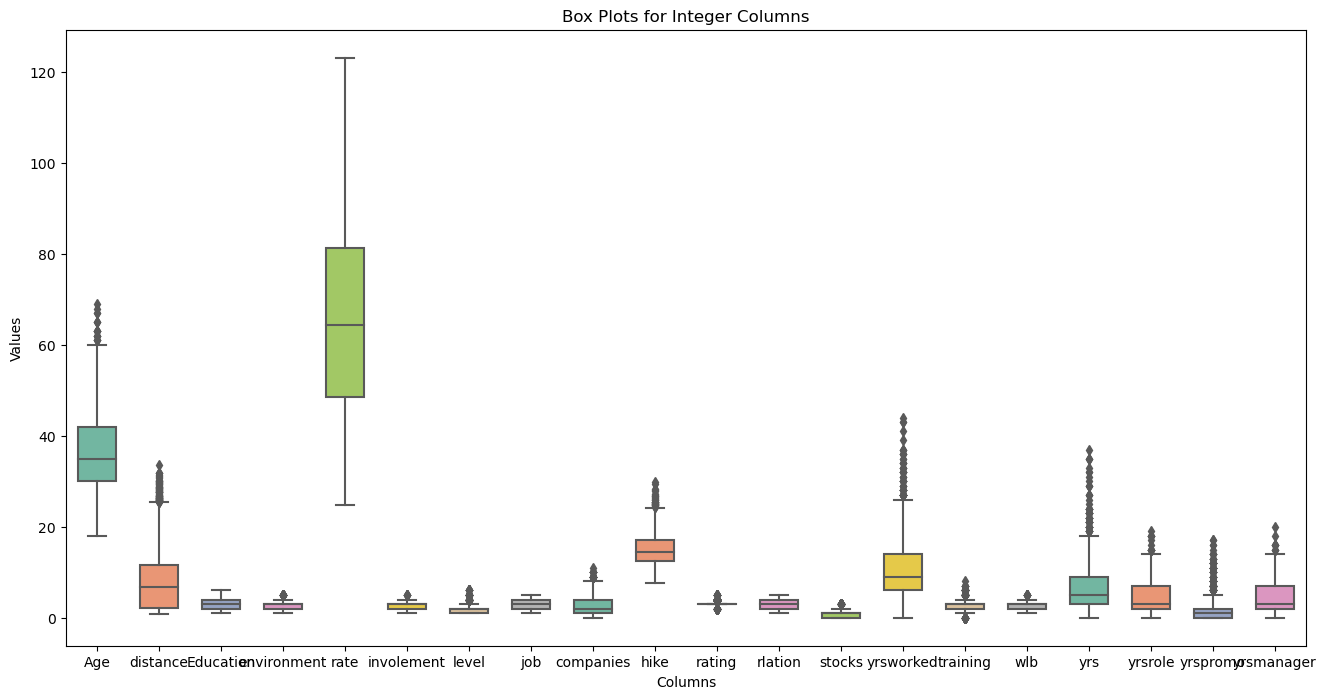

In [39]:
columns_to_plot = ['Age', 'distance', 'Education', 'environment', 'rate', 'involement', 'level', 'job', 'companies', 'hike', 'rating', 'rlation', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']

plt.figure(figsize=(16, 8))

sns.boxplot(data=df[columns_to_plot], width=0.6, palette="Set2")

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plots for Integer Columns")

plt.show()

the variable 'rate', 'education', 'job', 'rlation',  doesn't seem to have any outliers

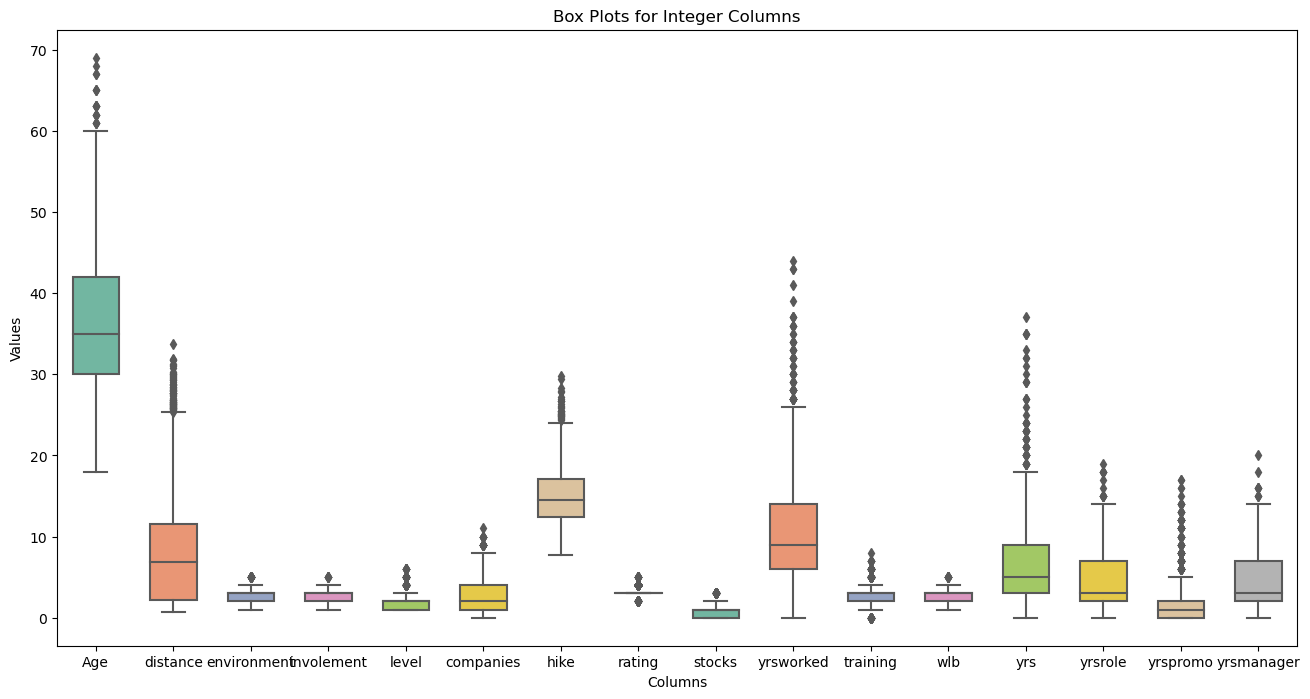

In [40]:
columns_to_plot = ['Age', 'distance', 'environment', 'involement', 'level', 'companies', 'hike', 'rating', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']

plt.figure(figsize=(16, 8))

sns.boxplot(data=df[columns_to_plot], width=0.6, palette="Set2")

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plots for Integer Columns")

plt.show()

the graph above indicates the presence of extreme values of outliers, hence i have to find a method to deal with the outliers

##### Removing Outliers

In [41]:
def remove_outliers_iqr(df, threshold=3):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return df[(df >= lower_bound) & (df <= upper_bound)].dropna()

df_no_outliers = remove_outliers_iqr(df)

df_no_outliers.shape

(0, 28)

as evidenced by the result this is not the best method for handling outliers for this dataset

##### Capping / winsorizing outliers

In [42]:

from scipy.stats.mstats import winsorize

def winsorize_dataframe(df, alpha=0.05):
    df_winsorized = df.apply(lambda x: winsorize(x, limits=(alpha, alpha)).data)
    return pd.DataFrame(df_winsorized, columns=df.columns)

df_winsorized = winsorize_dataframe(df)

df_winsorized.shape

(1181, 28)

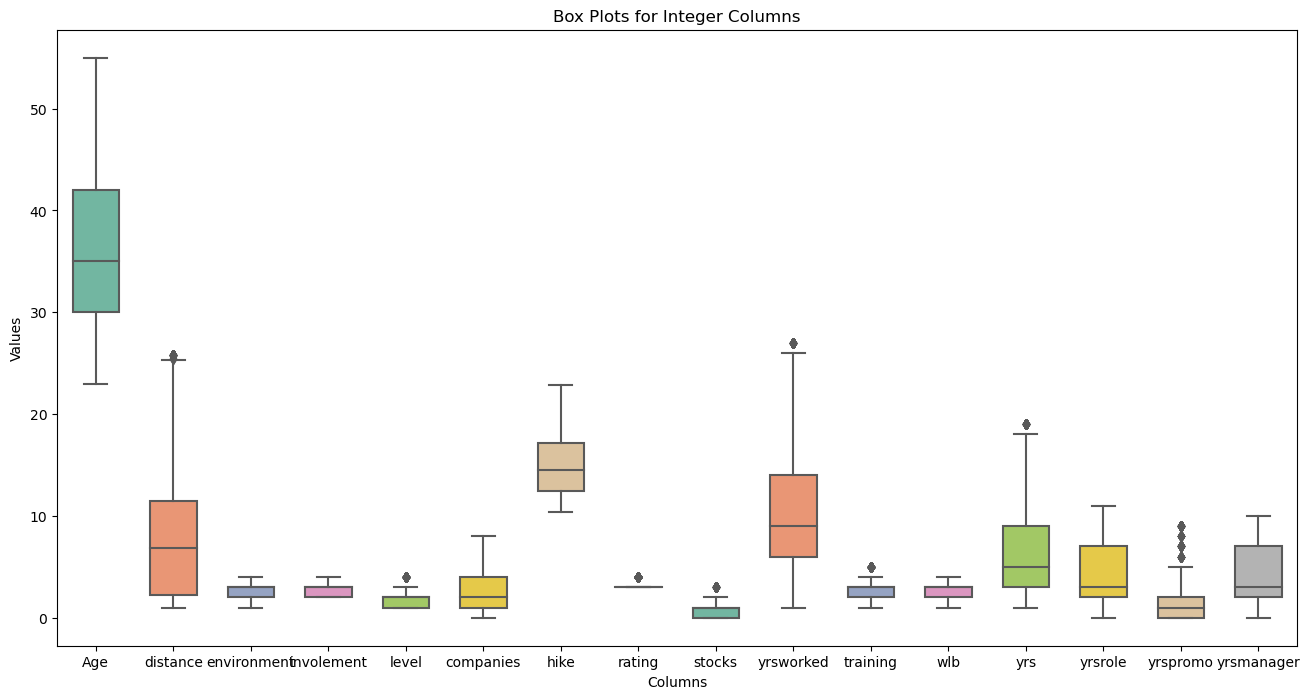

In [43]:
columns_to_plot = ['Age', 'distance', 'environment', 'involement', 'level', 'companies', 'hike', 'rating', 'stocks', 'yrsworked', 'training', 'wlb', 'yrs', 'yrsrole', 'yrspromo', 'yrsmanager']

plt.figure(figsize=(16, 8))

sns.boxplot(data=df_winsorized[columns_to_plot], width=0.6, palette="Set2")

plt.xlabel("Columns")
plt.ylabel("Values")
plt.title("Box Plots for Integer Columns")

plt.show()

this method seems to handle the outliers well.

In [44]:
df = df_winsorized.copy()

In [45]:
df.head()

,Age,Attrition,travel,dpt,distance,Education,field,environment,Gender,rate,involement,level,role,job,marriage,companies,OverTime,hike,rating,rlation,stocks,yrsworked,training,wlb,yrs,yrsrole,yrspromo,yrsmanager
0,42,Yes,Travel_Rarely,Sales,1.02,2,Life Sciences,2,Male,93.83,3,2,Sales Executive,3,Single,7,Yes,10.36,3,1,0,8,1,1,6,4,0,5
1,52,No,Travel_Frequently,Research & Development,6.85,1,Life Sciences,3,Male,52.30,2,2,Research Scientist,2,Married,1,No,14.49,4,4,1,9,3,3,10,8,1,6
2,33,Yes,Travel_Rarely,Research & Development,2.20,2,Other,4,Male,87.27,2,1,Laboratory Technician,3,Single,6,Yes,15.40,3,2,0,8,3,3,1,0,0,0
3,35,No,Travel_Frequently,Sales,2.94,4,Life Sciences,4,Female,56.38,3,1,Research Scientist,3,Married,1,Yes,10.36,3,3,0,8,3,3,8,6,3,0
4,25,No,Travel_Rarely,Research & Development,1.99,1,Medical,1,Male,40.43,3,1,Laboratory Technician,2,Married,8,No,11.92,3,3,1,6,3,3,2,2,2,2


## Sample Questions to answer in this analysis

- are older people more satisfied with their jobs
- does distance travelled to work affect whether the employee keeps is happy at work or not
- does the education field also affect job satisfaction
- do higher earners tend to keep their jobs
- what roles do the higher earners have in the company
- those who have changed companies before do they tend to keep their trend
- if one is married does it mean their more stable with jobs
- do the managers have an influence on employees staying on their jobs
- if there is gender imbalance in the company

<Axes: xlabel='job', ylabel='Age'>

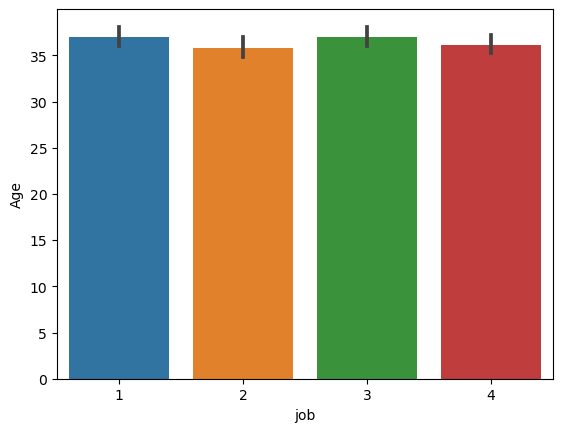

In [46]:
sns.barplot(x="job", y="Age", data=df)

In [47]:
df['job'].unique()

array([3, 2, 4, 1])

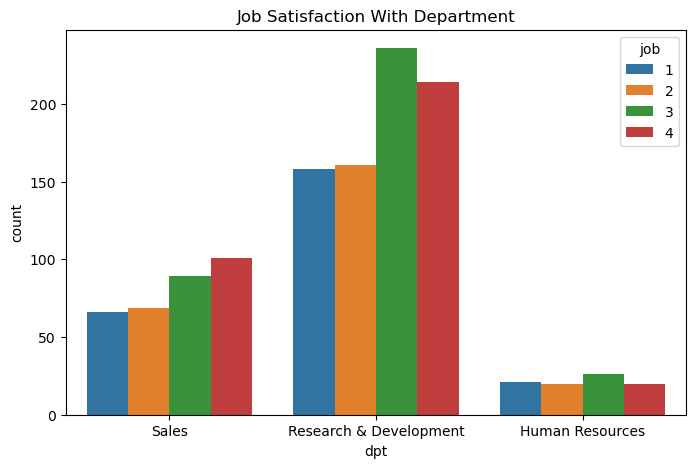

In [48]:
plt.figure(figsize=(8,5))

sns.countplot(x='dpt',hue='job', data=df)

plt.title("Job Satisfaction With Department")

plt.show()

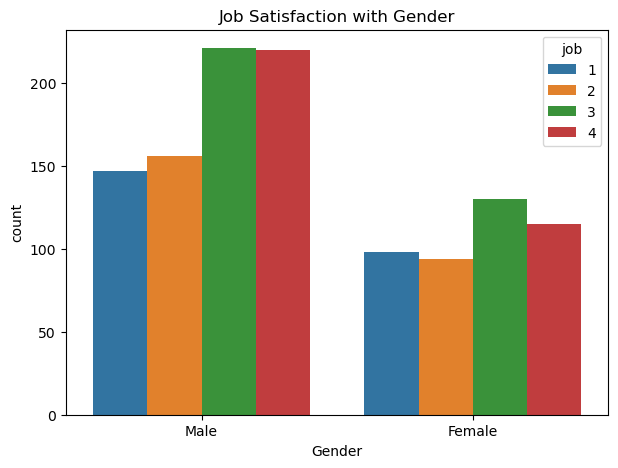

In [49]:
plt.figure(figsize=(7,5))

sns.countplot(x='Gender',hue='job', data=df)

plt.title("Job Satisfaction with Gender")

plt.show()

In [50]:
df['Gender'].value_counts()

Male      744
Female    437
Name: Gender, dtype: int64

In [51]:
df['count'] = 1
df.groupby(['Gender', 'Attrition']).agg({"count":"sum"})

count
Gender Attrition       
Female No           364
       Yes           73
Male   No           602
       Yes          142

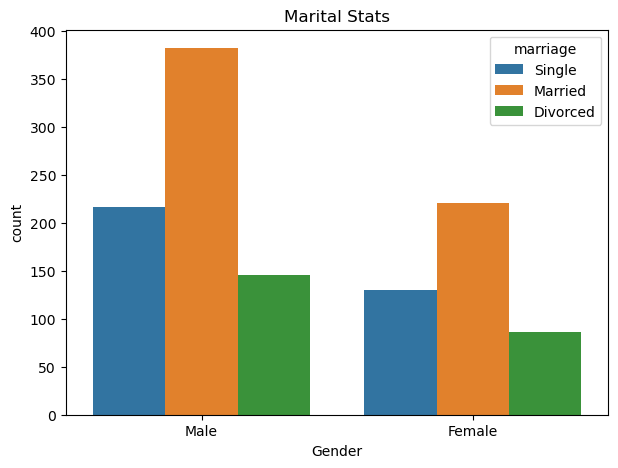

In [52]:
plt.figure(figsize=(7,5))

sns.countplot(x='Gender',hue='marriage', data=df)

plt.title("Marital Stats")

plt.show()

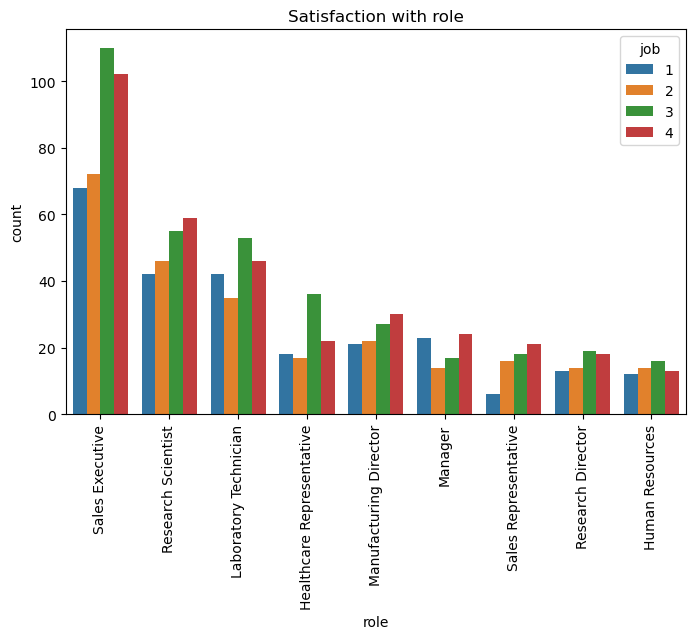

In [53]:
plt.figure(figsize=(8,5))

sns.countplot(x='role',hue='job', data=df)

plt.title("Satisfaction with role")

plt.xticks(rotation=90)

plt.show()

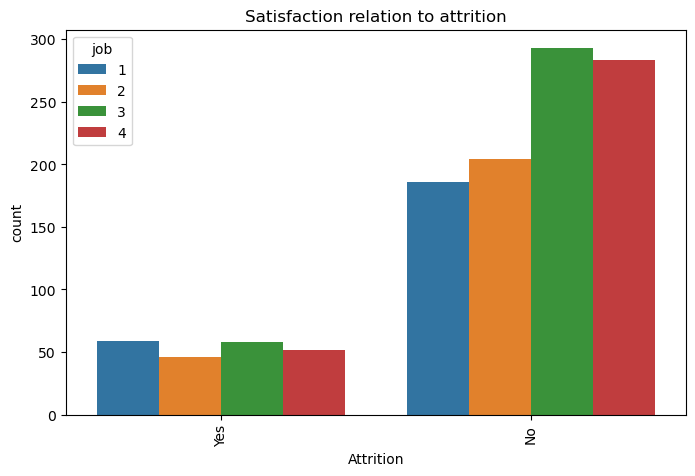

In [54]:
plt.figure(figsize=(8,5))

sns.countplot(x='Attrition',hue='job', data=df)

plt.title("Satisfaction relation to attrition")

plt.xticks(rotation=90)

plt.show()

Text(0.5, 0.98, 'hourly rate based on role and department')

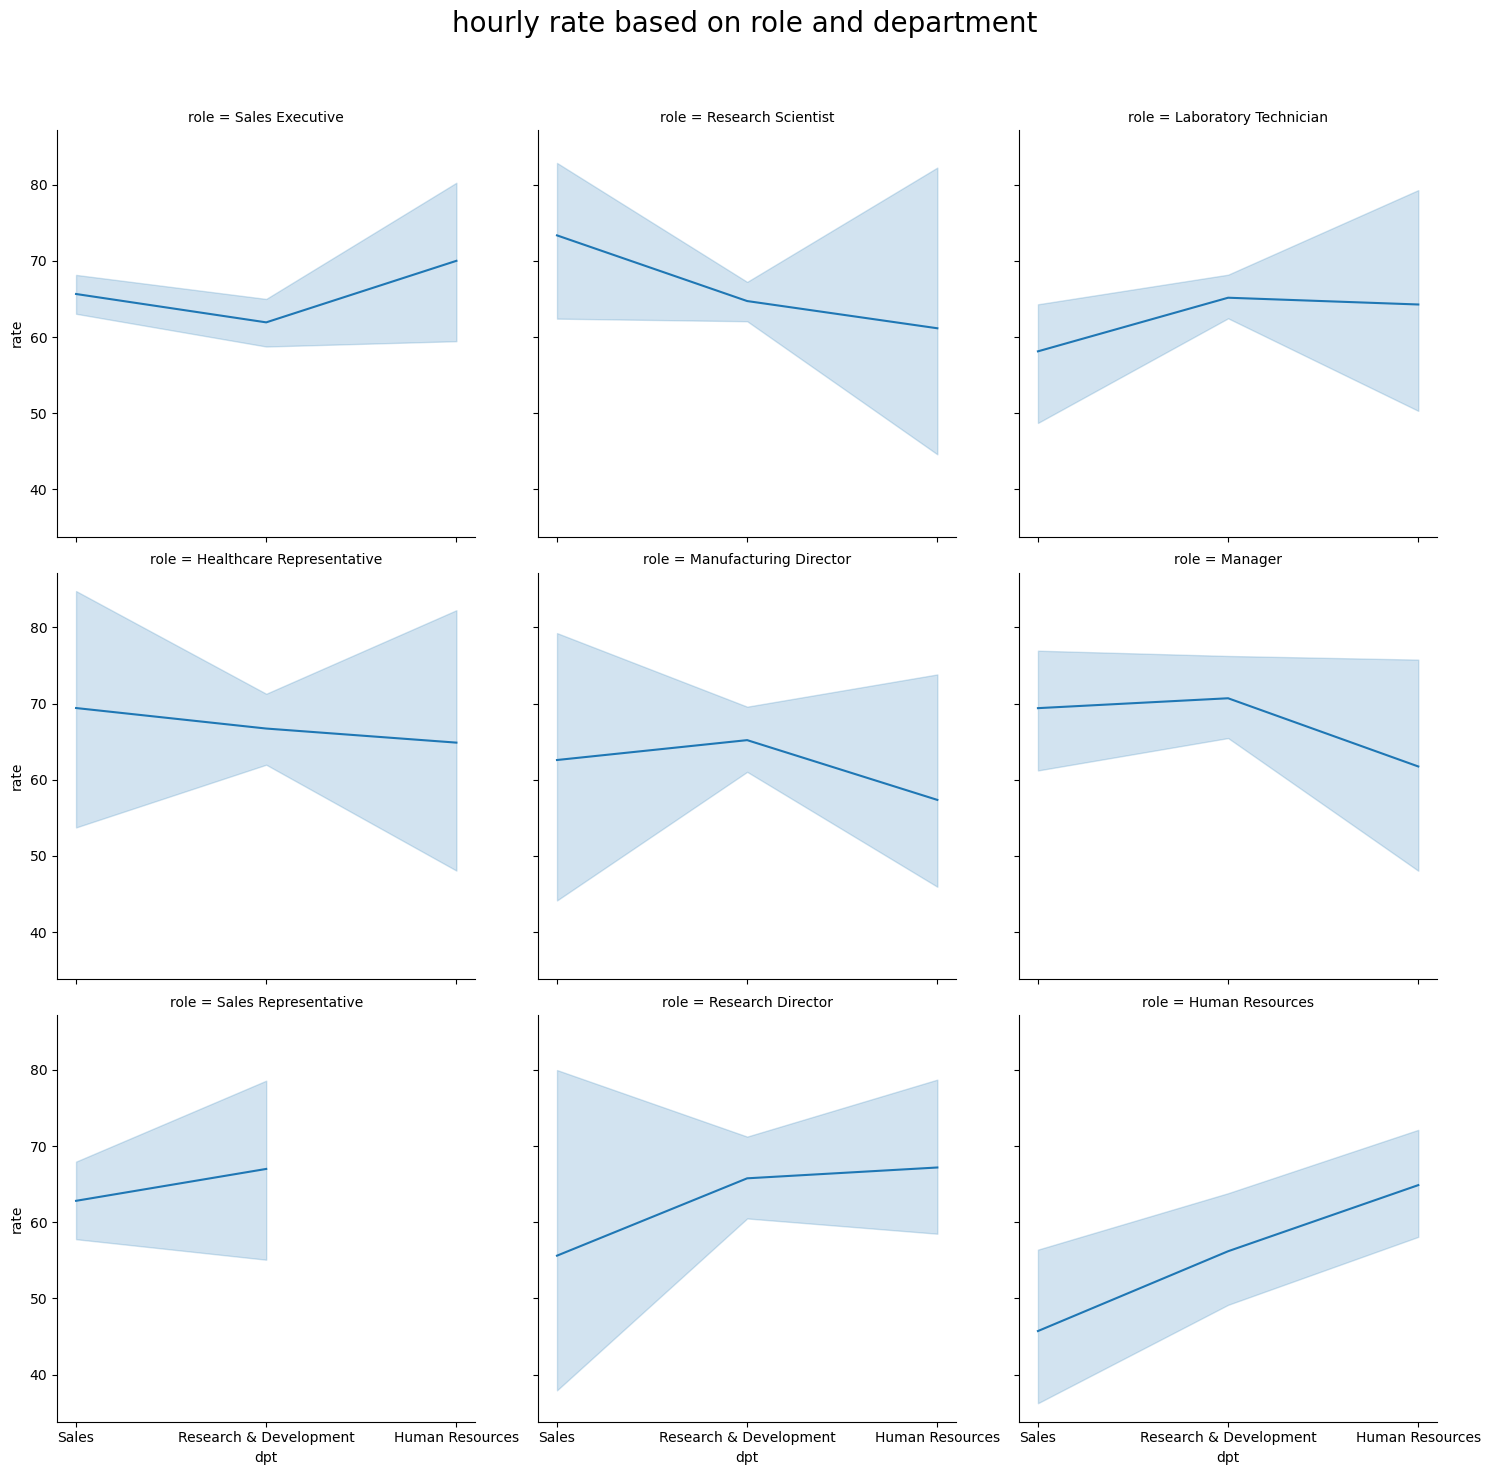

In [55]:
ax = sns.relplot(col="role", y="rate", kind="line",x='dpt', data=df, col_wrap=3)

ax.fig.subplots_adjust(top=0.9)

ax.fig.suptitle('hourly rate based on role and department',fontsize=20)

Text(0.5, 0.98, 'job satisfaction based on role and department')

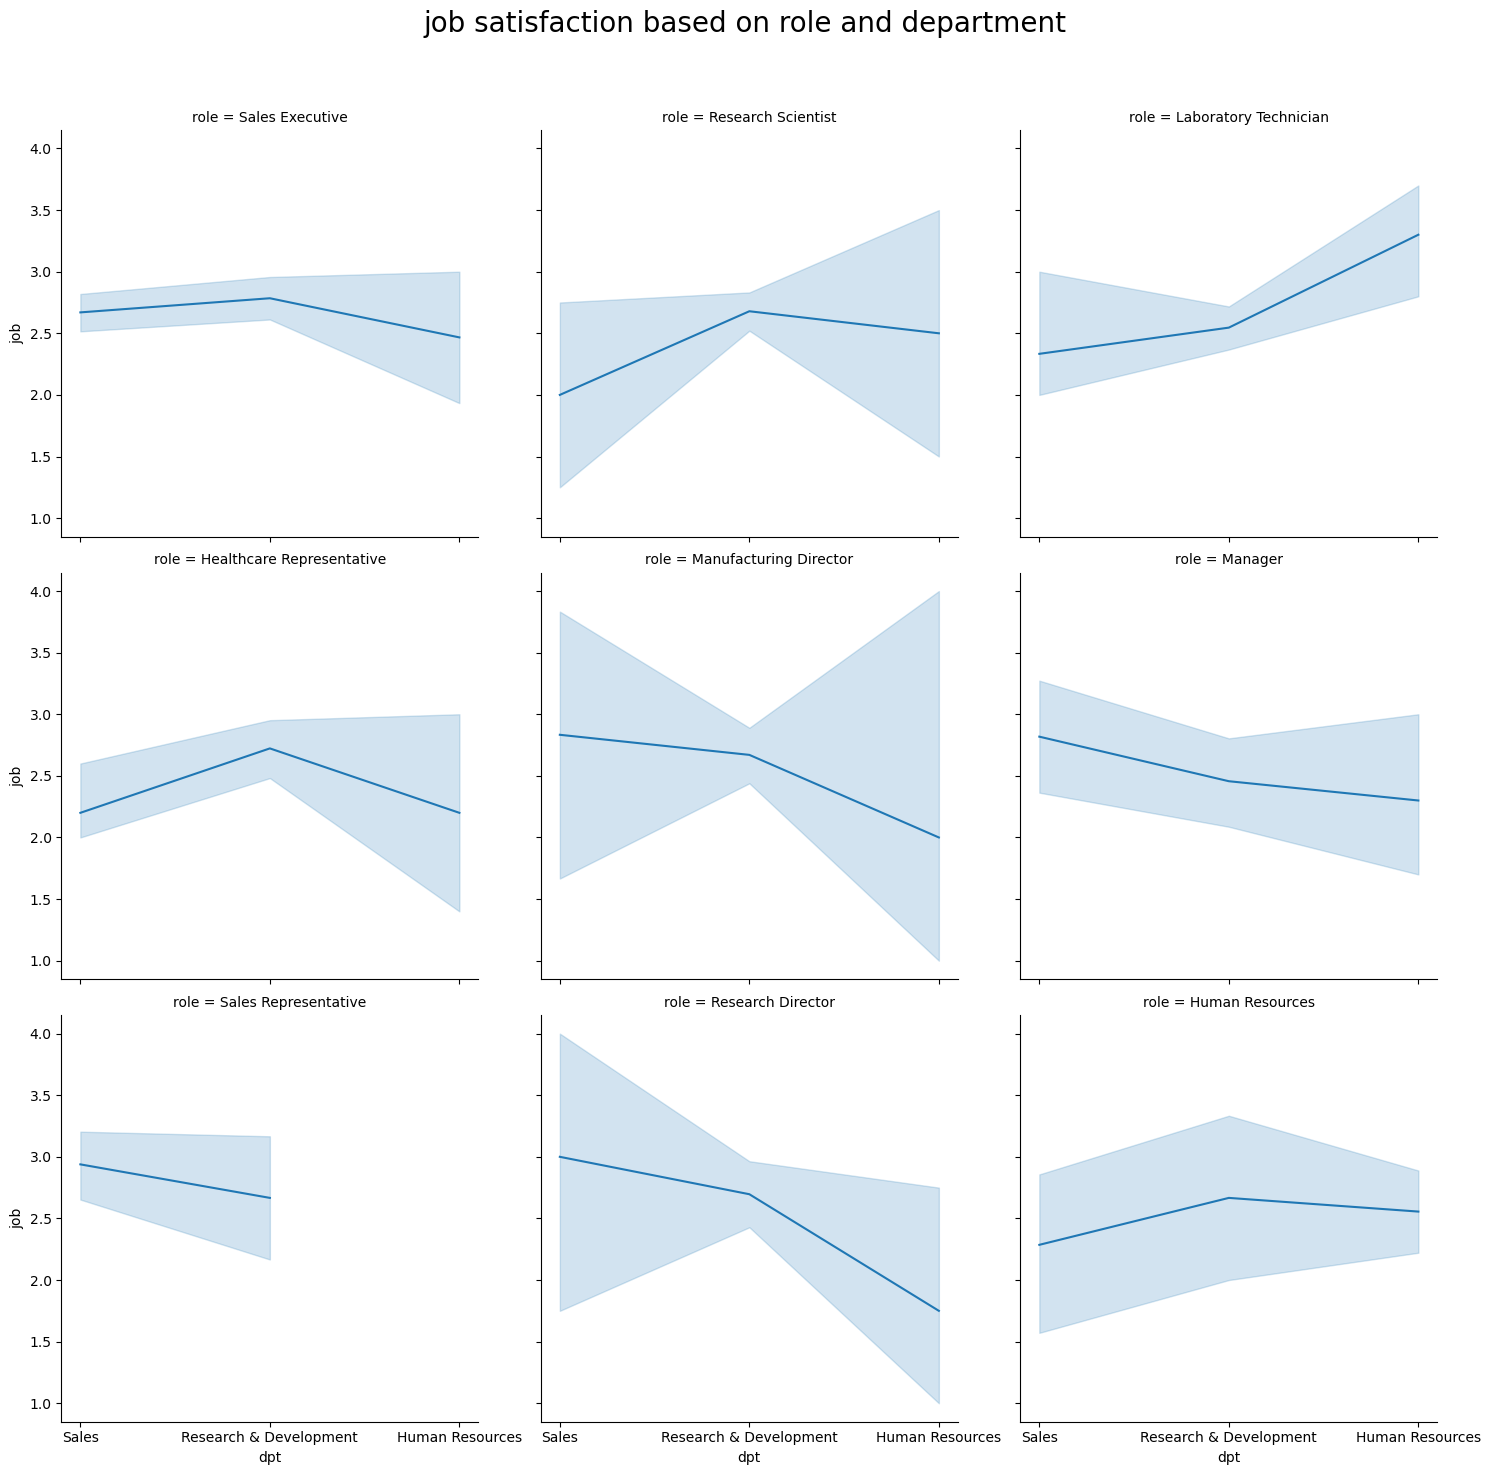

In [56]:
ax = sns.relplot(col="role", y="job", kind="line",x='dpt', data=df, col_wrap=3)

ax.fig.subplots_adjust(top=0.9)

ax.fig.suptitle('job satisfaction based on role and department',fontsize=20)

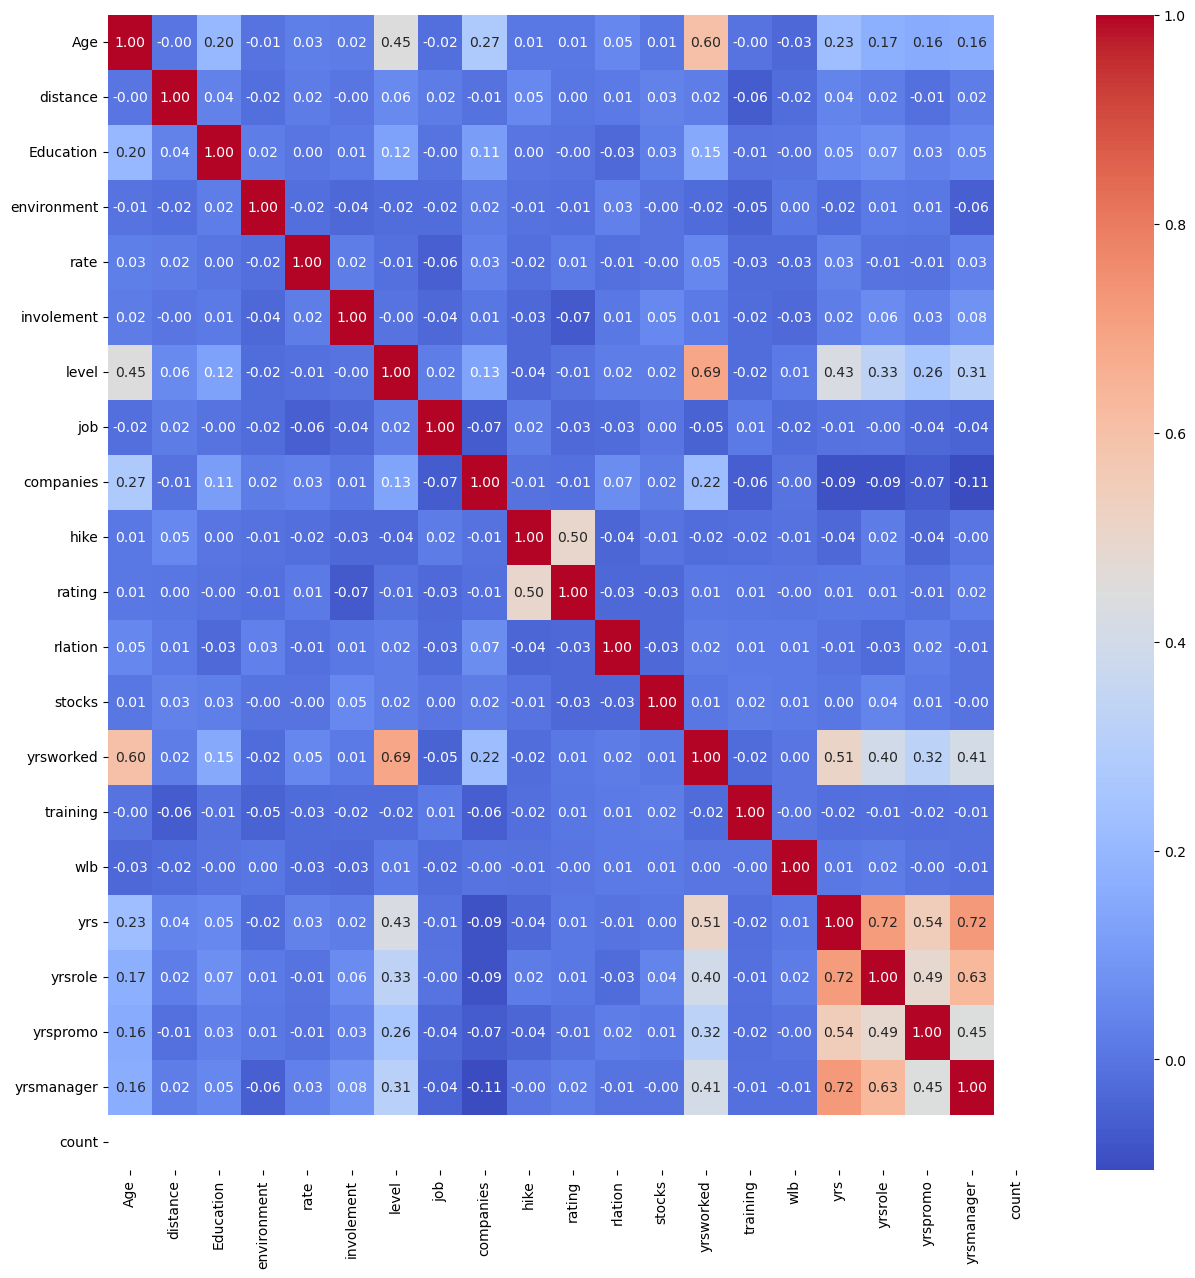

In [57]:
correlation_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [58]:
to_remove = ['count', 'yrsworked', 'yrspromo', 'yrsrole', 'yrsmanager', ]
df.drop(columns = to_remove, inplace=True)
df.shape

(1181, 24)

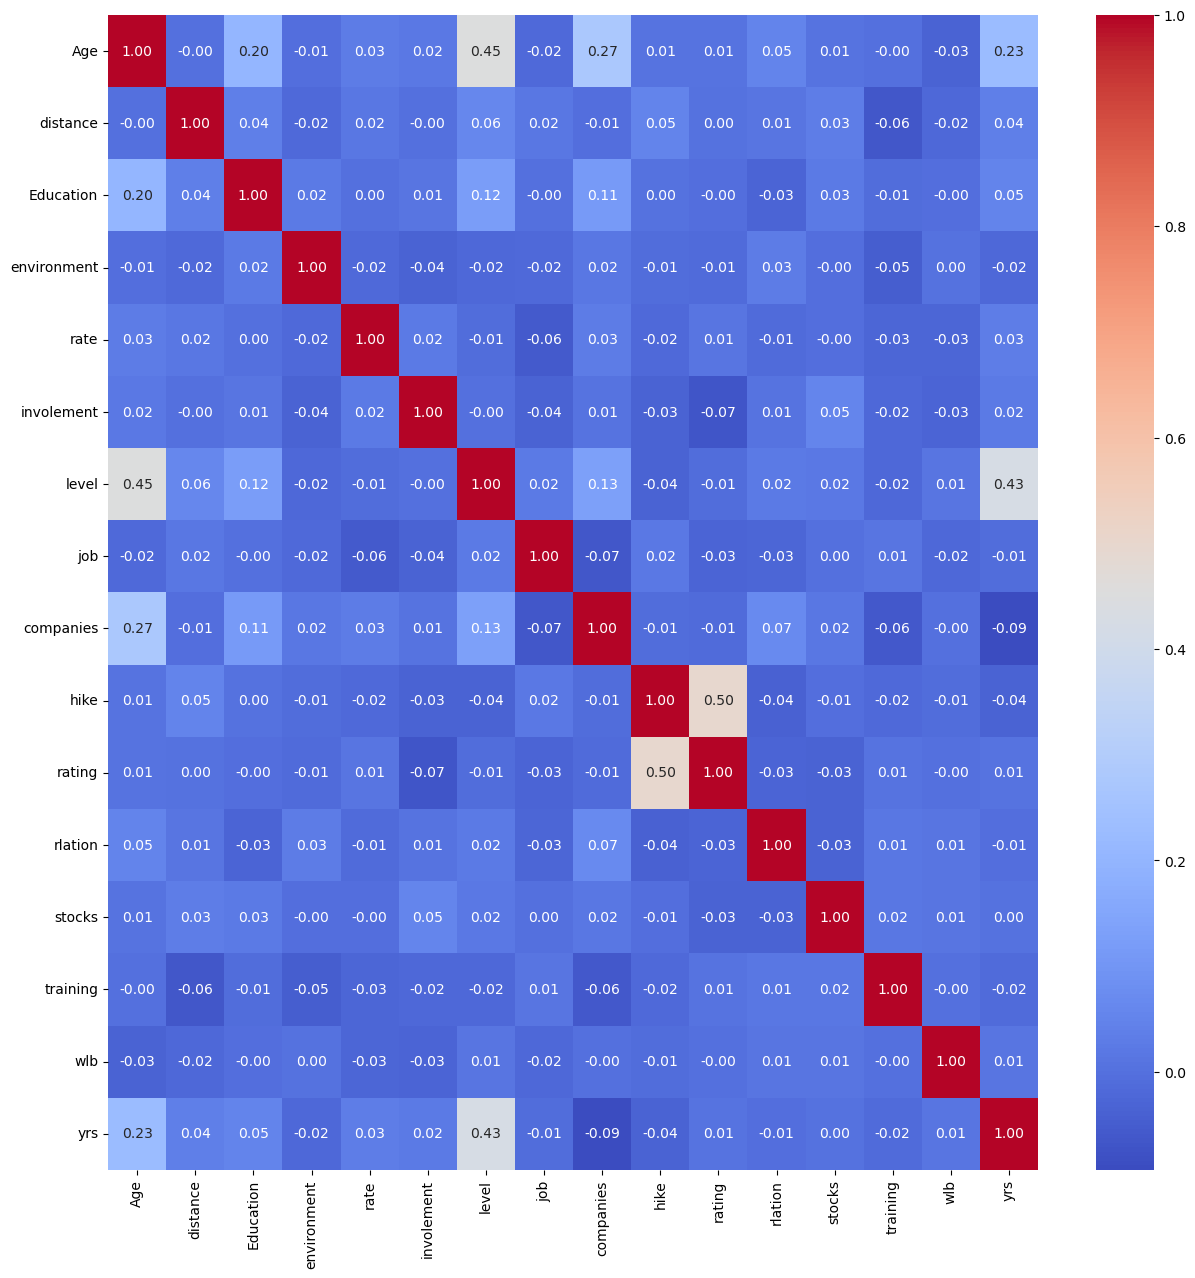

In [59]:
correlation_matrix = df.corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

## ANOVA 

for hypothesis testing and also to identify which columns will not be helpful in the machine learning model build up, for columns that follow a normal distribution

i use Shapiro to identify attributes that follow normal distribution

In [60]:
df_original = df.copy()

In [61]:
from scipy.stats import shapiro

integer_columns = df.select_dtypes(include='int32')

float_columns = df.select_dtypes(include='float')

for column in integer_columns.columns:
    stat, p_value = shapiro(integer_columns[column])
    print(f"Shapiro-Wilk test for {column}: p-value = {p_value}")

for column in float_columns.columns:
    stat, p_value = shapiro(float_columns[column])
    print(f"Shapiro-Wilk test for {column}: p-value = {p_value}")
    
    alpha = 0.05
    if p_value > alpha:
        print(f"The data in {column} appears to be normally distributed.\n")
    else:
        print(f"The data in {column} does not appear to be normally distributed.\n")

Shapiro-Wilk test for Age: p-value = 2.7817590276730203e-19
Shapiro-Wilk test for Education: p-value = 4.630720980538236e-27
Shapiro-Wilk test for environment: p-value = 3.235380340045049e-31
Shapiro-Wilk test for involement: p-value = 1.2475620098037414e-38
Shapiro-Wilk test for level: p-value = 3.312741215700167e-34
Shapiro-Wilk test for job: p-value = 1.1182678768906412e-31
Shapiro-Wilk test for companies: p-value = 3.095844003120979e-33
Shapiro-Wilk test for rating: p-value = 0.0
Shapiro-Wilk test for rlation: p-value = 2.0072776799471906e-31
Shapiro-Wilk test for stocks: p-value = 2.778652078589862e-36
Shapiro-Wilk test for training: p-value = 3.667202929412839e-29
Shapiro-Wilk test for wlb: p-value = 3.0222125494012984e-36
Shapiro-Wilk test for yrs: p-value = 1.0974875112666918e-30
Shapiro-Wilk test for distance: p-value = 7.528103272524795e-32
The data in distance does not appear to be normally distributed.

Shapiro-Wilk test for rate: p-value = 2.743136258812906e-18
The data in

- the Shapiro_Wilk test done indicates that there are no columns that follow a normal distribution. 
- i will try and tranform the attributes to make them follow a normal distribution to help in the machine learning model build up
- tranformation method will be the Box-Cox which employs both the logarithimic method and the square root method

In [62]:
from scipy.stats import boxcox

transformed_df = integer_columns.apply(lambda x: boxcox(x + 1)[0])

print("Original DataFrame:")
print(df)

print("\nTransformed DataFrame:")
print(transformed_df)

Original DataFrame:
      Age Attrition             travel                     dpt  distance  \
0      42       Yes      Travel_Rarely                   Sales      1.02   
1      52        No  Travel_Frequently  Research & Development      6.85   
2      33       Yes      Travel_Rarely  Research & Development      2.20   
3      35        No  Travel_Frequently                   Sales      2.94   
4      25        No      Travel_Rarely  Research & Development      1.99   
...   ...       ...                ...                     ...       ...   
1463   35        No         Non-Travel  Research & Development      4.50   
1464   28        No      Travel_Rarely                   Sales      5.13   
1465   37        No  Travel_Frequently  Research & Development     21.65   
1467   27        No      Travel_Rarely  Research & Development      6.85   
1469   38        No      Travel_Rarely  Research & Development      7.23   

      Education          field  environment  Gender   rate  involem

In [63]:
int_cols = transformed_df.select_dtypes(include='int32')

for column in int_cols.columns:
    stat, p_value = shapiro(int_cols[column])
    print(f"Shapiro-Wilk test for {column}: p-value = {p_value}")

    
    alpha = 0.05
    if p_value > alpha:
        print(f"The data in {column} appears to be normally distributed.\n")
    else:
        print(f"The data in {column} does not appear to be normally distributed.\n")

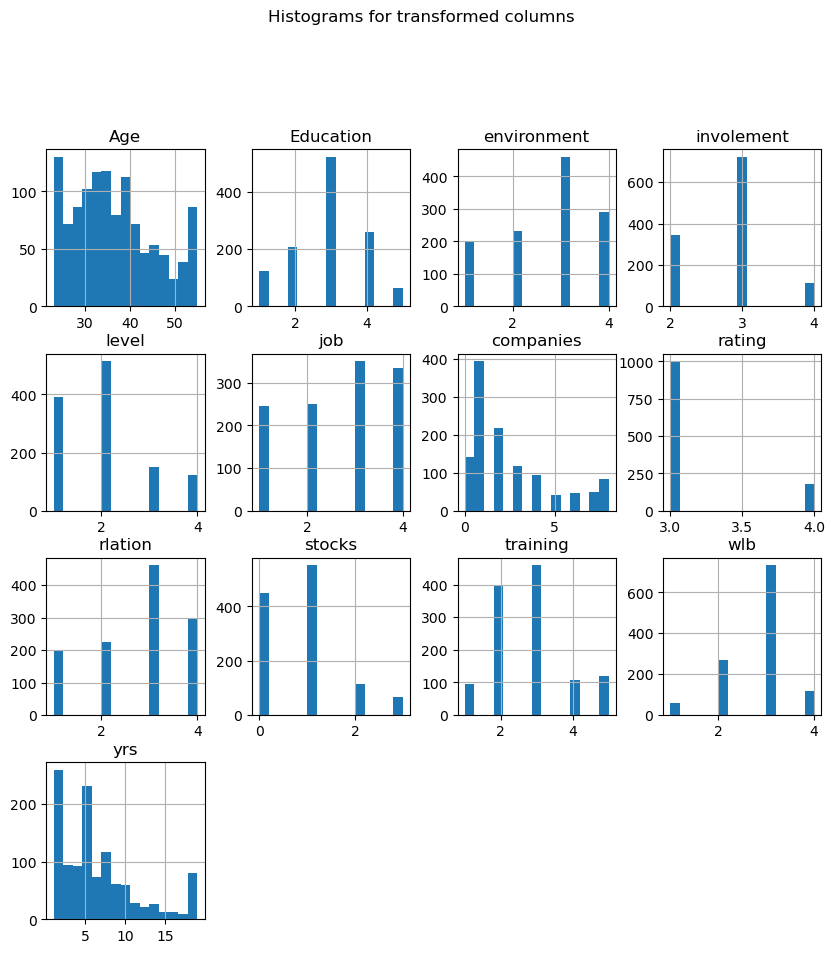

In [64]:
integer_columns.hist(bins=15, figsize=(10, 10))
plt.suptitle('Histograms for transformed columns', y=1.02)
plt.show()

even after using Shapiro, normality is not satisfied for this analysis
- i will use Kruskal-Wallis Test as a non-parametrics altenative for the ANOVA test

#### Kruskal-Wallis Test:

In [65]:
import scipy.stats as stats

statistic, p_value = stats.kruskal('Age', 'distance', 'Education', 'environment', 'rate', 'involement',
       'level', 'job', 'companies', 'hike', 'rating', 'rlation', 'stocks', 'training', 'wlb', 'yrs')

print("Kruskal-Wallis Statistic:", statistic)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis. There are significant differences.")
else:
    print("Fail to reject the null hypothesis. No significant differences.")


Kruskal-Wallis Statistic: 15.0
P-value: 0.4514172112257256
Fail to reject the null hypothesis. No significant differences.


## Encoding.

the process of encoding is done to convert categorical data into integers that can be using bu the machine learning algorithms. the method i selected for the encoding is the Label Encoding because of the nature of my dataset.

In [66]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Object columns:", object_columns)

Object columns: ['Attrition', 'travel', 'dpt', 'field', 'Gender', 'role', 'marriage', 'OverTime']


In [67]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df[object_columns] = df[object_columns].apply(label_encoder.fit_transform)

In [68]:
for column in object_columns:
    unique_encoded_values = df[column].unique()   
    print(f"Unique encoded values for column '{column}' {df_original[column].unique()} : {unique_encoded_values}")

Unique encoded values for column 'Attrition' ['Yes' 'No'] : [1 0]
Unique encoded values for column 'travel' ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] : [2 1 0]
Unique encoded values for column 'dpt' ['Sales' 'Research & Development' 'Human Resources'] : [2 1 0]
Unique encoded values for column 'field' ['Life Sciences' 'Other' 'Medical' 'Technical Degree' 'Marketing'] : [0 3 2 4 1]
Unique encoded values for column 'Gender' ['Male' 'Female'] : [1 0]
Unique encoded values for column 'role' ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Healthcare Representative' 'Manufacturing Director' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] : [7 6 2 0 4 3 8 5 1]
Unique encoded values for column 'marriage' ['Single' 'Married' 'Divorced'] : [2 1 0]
Unique encoded values for column 'OverTime' ['Yes' 'No'] : [1 0]


In [69]:
df.head()

,Age,Attrition,travel,dpt,distance,Education,field,environment,Gender,rate,involement,level,role,job,marriage,companies,OverTime,hike,rating,rlation,stocks,training,wlb,yrs
0,42,1,2,2,1.02,2,0,2,1,93.83,3,2,7,3,2,7,1,10.36,3,1,0,1,1,6
1,52,0,1,1,6.85,1,0,3,1,52.30,2,2,6,2,1,1,0,14.49,4,4,1,3,3,10
2,33,1,2,1,2.20,2,3,4,1,87.27,2,1,2,3,2,6,1,15.40,3,2,0,3,3,1
3,35,0,1,2,2.94,4,0,4,0,56.38,3,1,6,3,1,1,1,10.36,3,3,0,3,3,8
4,25,0,2,1,1.99,1,2,1,1,40.43,3,1,2,2,1,8,0,11.92,3,3,1,3,3,2


a big disadvantage of this encoding method is that it assigns a unique number from 0 to each class of data, hence a label with a high value maybe considered of more priority than one with a lower value. as an example for the Attribute, 'Role' a 'sales representative'is now represented by value '8' while a 'Healthcare representative' is now 0. this might look like the sales representative is more important than the healthcare representative.

- hence we have to try the one_hot encoding method which assigns a binary number to indicate presence of any variable. i think this will be perfect my dataset since the dataset is  not inorder(nominal)

In [70]:
df_original.head()

,Age,Attrition,travel,dpt,distance,Education,field,environment,Gender,rate,involement,level,role,job,marriage,companies,OverTime,hike,rating,rlation,stocks,training,wlb,yrs
0,42,Yes,Travel_Rarely,Sales,1.02,2,Life Sciences,2,Male,93.83,3,2,Sales Executive,3,Single,7,Yes,10.36,3,1,0,1,1,6
1,52,No,Travel_Frequently,Research & Development,6.85,1,Life Sciences,3,Male,52.30,2,2,Research Scientist,2,Married,1,No,14.49,4,4,1,3,3,10
2,33,Yes,Travel_Rarely,Research & Development,2.20,2,Other,4,Male,87.27,2,1,Laboratory Technician,3,Single,6,Yes,15.40,3,2,0,3,3,1
3,35,No,Travel_Frequently,Sales,2.94,4,Life Sciences,4,Female,56.38,3,1,Research Scientist,3,Married,1,Yes,10.36,3,3,0,3,3,8
4,25,No,Travel_Rarely,Research & Development,1.99,1,Medical,1,Male,40.43,3,1,Laboratory Technician,2,Married,8,No,11.92,3,3,1,3,3,2


In [71]:
y = df_original['job']
X = df_original.drop(columns = ['job'])

for the column 'Gender' we can manually encode male to be 0 and female to be 1 and also overtime, for no to be 0 and yes 1

In [72]:
X['Gender'] = np.where(X['Gender'] == 'Male', 0, 1)

X['OverTime'] = np.where(X['OverTime'] == 'No', 0, 1)

In [73]:
df_cat_cols = X.select_dtypes(include='object')

In [74]:
df_cat_cols.head()

,Attrition,travel,dpt,field,role,marriage
0,Yes,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,No,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Yes,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,No,Travel_Frequently,Sales,Life Sciences,Research Scientist,Married
4,No,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [75]:
df_cat_encoded = pd.get_dummies(df_cat_cols)
df_cat_encoded.head()

,Attrition_No,Attrition_Yes,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single
0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [76]:
df_num_cols = X.select_dtypes(include=np.number)
df_num_cols.head()

,Age,distance,Education,environment,Gender,rate,involement,level,companies,OverTime,hike,rating,rlation,stocks,training,wlb,yrs
0,42,1.02,2,2,0,93.83,3,2,7,1,10.36,3,1,0,1,1,6
1,52,6.85,1,3,0,52.30,2,2,1,0,14.49,4,4,1,3,3,10
2,33,2.20,2,4,0,87.27,2,1,6,1,15.40,3,2,0,3,3,1
3,35,2.94,4,4,1,56.38,3,1,1,1,10.36,3,3,0,3,3,8
4,25,1.99,1,1,0,40.43,3,1,8,0,11.92,3,3,1,3,3,2


In [77]:
X_true = pd.concat([df_num_cols, df_cat_encoded], axis=1)
X_true.head()

,Age,distance,Education,environment,Gender,rate,involement,level,companies,OverTime,hike,rating,rlation,stocks,training,wlb,yrs,Attrition_No,Attrition_Yes,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single
0,42,1.02,2,2,0,93.83,3,2,7,1,10.36,3,1,0,1,1,6,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,52,6.85,1,3,0,52.30,2,2,1,0,14.49,4,4,1,3,3,10,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,33,2.20,2,4,0,87.27,2,1,6,1,15.40,3,2,0,3,3,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,35,2.94,4,4,1,56.38,3,1,1,1,10.36,3,3,0,3,3,8,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,25,1.99,1,1,0,40.43,3,1,8,0,11.92,3,3,1,3,3,2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [78]:
X_true.shape

(1181, 42)

In [79]:
df_scaled = pd.concat([y, X_true], axis=1)
df_scaled.shape

(1181, 43)

## Scaling

looking at the dataset now, there are features with larger values, these can be dorminating over other features with smaller values, so we have to scale them to ensure all features contributes equally to the machine learning models.

- earlier on i had seen some outliers in the dataset but chose to ignore them. but this may bring a distortion in the Machine learning algorithm hence i will use the Robust Scalling method which uses the median and the IQR to handle outliers.
- scaling also helps data with high dimensionallity on the Principal Component Analysis

In [80]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [81]:
columns_to_scale = df_scaled.columns

X_trues = df_scaled.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled.head()

,job,Age,distance,Education,environment,Gender,rate,involement,level,companies,OverTime,hike,rating,rlation,stocks,training,wlb,yrs,Attrition_No,Attrition_Yes,travel_Non-Travel,travel_Travel_Frequently,travel_Travel_Rarely,dpt_Human Resources,dpt_Research & Development,dpt_Sales,field_Life Sciences,field_Marketing,field_Medical,field_Other,field_Technical Degree,role_Healthcare Representative,role_Human Resources,role_Laboratory Technician,role_Manager,role_Manufacturing Director,role_Research Director,role_Research Scientist,role_Sales Executive,role_Sales Representative,marriage_Divorced,marriage_Married,marriage_Single
0,0.0,0.583333,-0.629590,-0.5,-1.0,0.0,0.896719,0.0,0.0,1.666667,1.0,-0.882479,0.0,-1.0,-1.0,-2.0,-2.0,0.166667,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,1.0
1,-0.5,1.416667,0.000000,-1.0,0.0,0.0,-0.364824,-1.0,0.0,-0.333333,0.0,0.000000,1.0,0.5,0.0,0.0,0.0,0.833333,0.0,0.0,0.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-0.166667,-0.502160,-0.5,1.0,0.0,0.697448,-1.0,-1.0,1.333333,1.0,0.194444,0.0,-0.5,-1.0,0.0,0.0,-0.666667,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0
3,0.0,0.000000,-0.422246,0.5,1.0,1.0,-0.240887,0.0,-1.0,-0.333333,1.0,-0.882479,0.0,0.0,-1.0,0.0,0.0,0.500000,0.0,0.0,0.0,1.0,-1.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.5,-0.833333,-0.524838,-1.0,-2.0,0.0,-0.725395,0.0,-1.0,2.000000,0.0,-0.549145,0.0,0.0,0.0,0.0,0.0,-0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### - using the one-hot method for encoding introduces a high dimensionality to the dataset, hence the need to use dimensionality reduction techniques like PCA and LDA

## Principal Component Analysis (PCA)

PCA works by tranforming correlated variables into smaller number of uncorrelated variables effectivley summarising the key patterns in the dataset.

- this reduction of number of variables also help with simplifying data visuals and analysis, easily identifying patterns and relationships within the data

- eliminating highly correlated features helps reduces the risk of data overfitting in machine learning model. Overfitting in machine learning is when a model fita the training data too closely and fail to capture the true relationships between variables, in the end poorly performing on new data

#### Overall Variance:

PCA is primarily concerned with capturing the maximum variance in the dataset.
The principal components (PC1, PC2, etc.) are derived to maximize the variance of the data along these components.
Points that are spread out in the PCA plot indicate high variability in the data along those directions.

#### Unsupervised Dimensionality Reduction:

PCA is an unsupervised technique that doesn't take into account any information about the target variable.
The separation observed in a PCA plot is based solely on the overall variance in the dataset.
Insights:

The PCA plot helps identify which features contribute the most to the overall variance in the data.
It doesn't specifically focus on how well the data separates based on the target variable.

In [82]:
y = df_scaled['job']
X = df_scaled.drop(columns = ['job'])

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

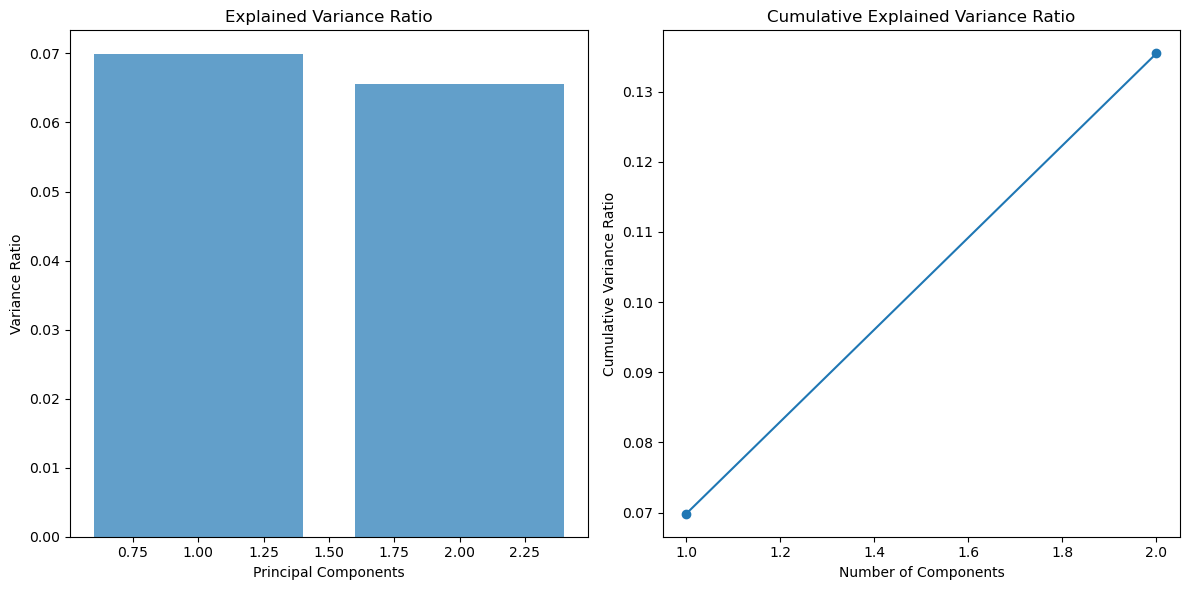

Principal Component 1: Cumulative Explained Variance = 0.0699
Principal Component 2: Cumulative Explained Variance = 0.1355


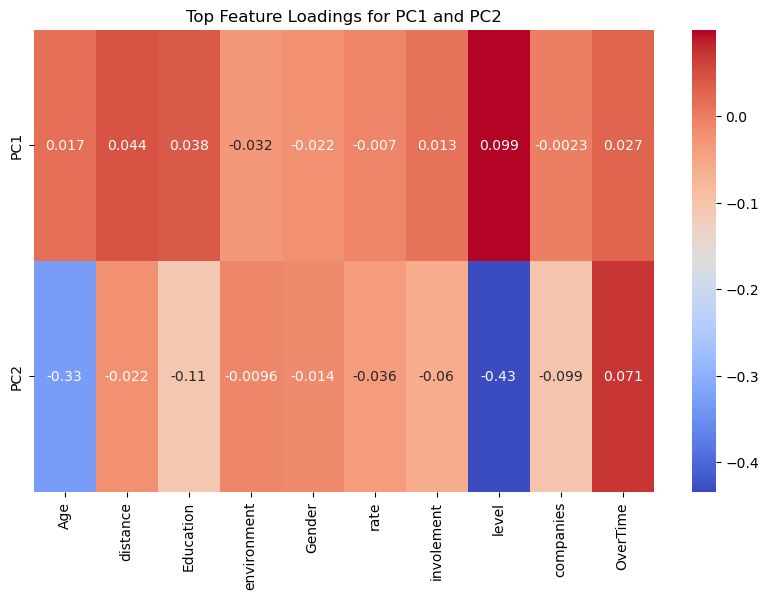

In [84]:
def apply_pca(X, num_components=None):
    """
    Apply Principal Component Analysis (PCA) to the input data.

    Parameters:
    - X: Input data.
    - num_components: Number of components to keep (default is None, which keeps all components).

    Returns:
    - X_pca: Transformed data after PCA.
    - pca: PCA model.
    """

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    
    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)

    return X_pca, pca

def plot_pca_variance(pca):
    """
    Plot the explained variance ratio and cumulative explained variance ratio for PCA.

    Parameters:
    - pca: PCA model.
    """
    exp_var_ratio = pca.explained_variance_ratio_
    cumu_var_ratio = np.cumsum(exp_var_ratio)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(1, len(exp_var_ratio) + 1), exp_var_ratio, alpha=0.7)
    plt.title('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Ratio')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumu_var_ratio) + 1), cumu_var_ratio, marker='o')
    plt.title('Cumulative Explained Variance Ratio')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Variance Ratio')

    plt.tight_layout()
    plt.show()

  
    for i, ratio in enumerate(cumu_var_ratio):
        print(f"Principal Component {i+1}: Cumulative Explained Variance = {ratio:.4f}")

def plot_feature_loadings(pca, features, num_features=10):
    """
    Plot the loadings of the top features for the first two principal components.

    Parameters:
    - pca: PCA model.
    - features: List of feature names.
    - num_features: Number of top features to display (default is 10).
    """
    loadings = pca.components_[:2, :]

    plt.figure(figsize=(10, 6))
    sns.heatmap(loadings[:, :num_features], annot=True, cmap='coolwarm', xticklabels=features[:num_features], yticklabels=[f'PC1', 'PC2'])
    plt.title('Top Feature Loadings for PC1 and PC2')
    plt.show()


y = df_scaled['job']
X = df_scaled.drop(columns=['job'])
feature_names = X.columns

X_pca, pca_model = apply_pca(X, num_components=2)
plot_pca_variance(pca_model)
plot_feature_loadings(pca_model, feature_names)


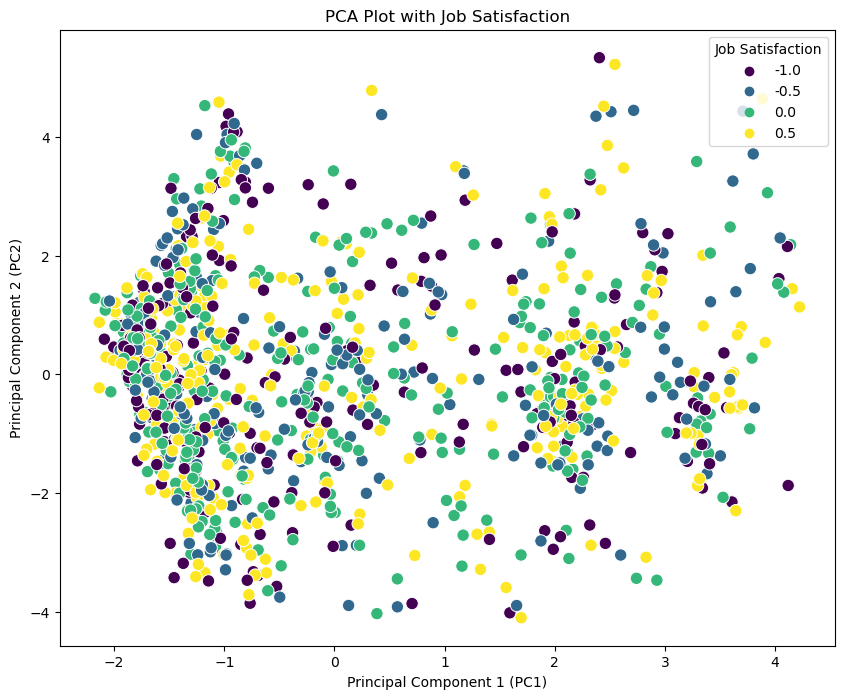

In [85]:
def apply_pca(X, num_components=None):
    """
    Apply Principal Component Analysis (PCA) to the input data.

    Parameters:
    - X: Input data.
    - num_components: Number of components to keep (default is None, which keeps all components).

    Returns:
    - X_pca: DataFrame with transformed data after PCA.
    - pca: PCA model.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=num_components)
    X_pca = pca.fit_transform(X_scaled)

    df_pca = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, num_components + 1)])
    df_pca['JobSatisfaction'] = y.values

    return df_pca, pca

def plot_pca(df_pca):
    """
    Plot the PCA plot with color-coded job satisfaction.

    Parameters:
    - df_pca: DataFrame with PCA-transformed data.
    """
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='JobSatisfaction', data=df_pca, palette='viridis', edgecolor='w', s=80)
    plt.title('PCA Plot with Job Satisfaction')
    plt.xlabel('Principal Component 1 (PC1)')
    plt.ylabel('Principal Component 2 (PC2)')
    plt.legend(title='Job Satisfaction', loc='upper right')
    plt.show()

y = df_scaled['job']
X = df_scaled.drop(columns=['job'])

df_pca, pca_model = apply_pca(X, num_components=2)
plot_pca(df_pca)



In [86]:
df_pca.shape

(1181, 3)

In [87]:
df_pca.head()

,PC1,PC2,JobSatisfaction
0,2.872012,1.813633,0.0
1,-1.732309,-0.080990,-0.5
2,-0.919733,3.658798,0.0
3,0.637826,0.858135,0.0
4,-1.866933,0.704845,-0.5


## Linear Discriminant Analysis (LDA)

LDA is a supervised technique that aims to find the linear combinations of features that best separate different classes (in this case, levels of job satisfaction).
LDA explicitly considers information about the target variable.
Maximizing Class Differences:

The linear discriminants (LD1, LD2) are derived to maximize the separation between different classes while minimizing the variance within each class.
Insights:

The LDA plot provides insights into how well the features discriminate between different levels of job satisfaction.
Points that are close together in the LDA plot are expected to be more similar in terms of job satisfaction, and the plot shows how well the algorithm separates the classes.

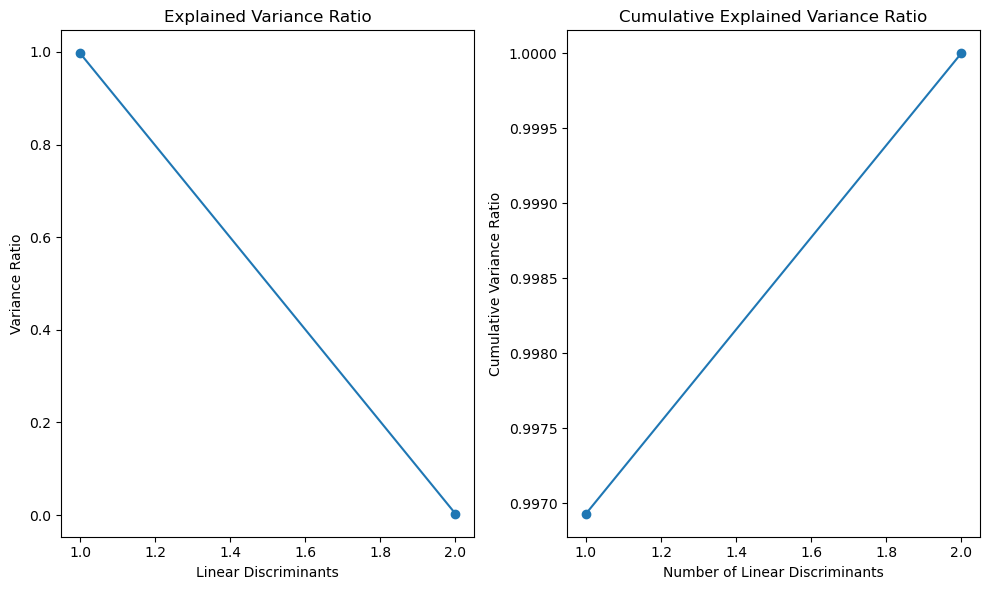

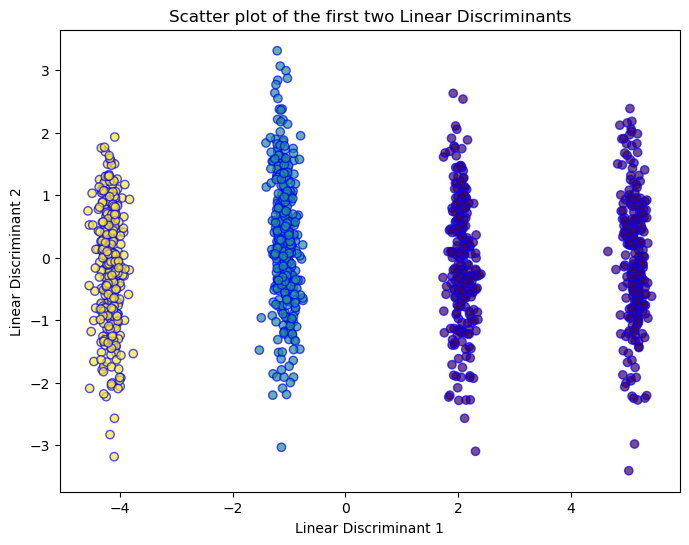

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import RobustScaler


y_categorical = pd.cut(y, bins=3, labels=['Class1', 'Class2', 'Class3'])
y_categorical_encoded = LabelEncoder().fit_transform(y_categorical)

X_scaled = df_scaled

scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_scaled), columns=X_scaled.columns)

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y_categorical_encoded)

exp_var_ratio = lda.explained_variance_ratio_
cumu_var_ratio = np.cumsum(exp_var_ratio)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(exp_var_ratio) + 1), exp_var_ratio, marker='o')
plt.title('Explained Variance Ratio')
plt.xlabel('Linear Discriminants')
plt.ylabel('Variance Ratio')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumu_var_ratio) + 1), cumu_var_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Linear Discriminants')
plt.ylabel('Cumulative Variance Ratio')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_categorical_encoded, cmap='viridis', edgecolors='b', alpha=0.7)
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('Scatter plot of the first two Linear Discriminants')
plt.show()


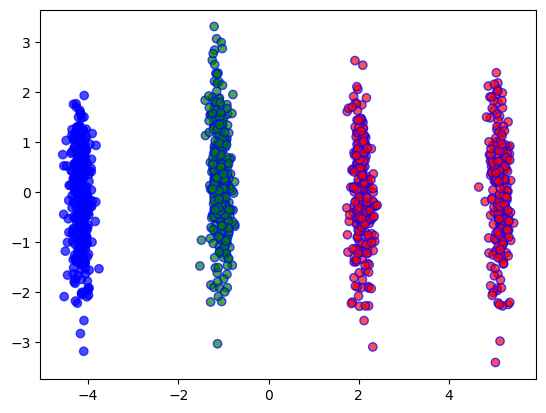

In [89]:
from matplotlib.colors import ListedColormap

lda = LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X_scaled, y_categorical)

cmap_bold = ListedColormap(['red', 'green', 'blue'])

label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y_categorical)

plt.scatter(
    X_lda[:, 0],
    X_lda[:, 1],
    c=y_numeric,
    cmap=cmap_bold,
    alpha=0.7,
    edgecolors='b'
)


## Machine Learning

using 'Job Satisfaction' as the target variable makes the dataset a supervised dataset as we know already what kind of results we will be expecting in the study, and also the training data is labeled

### Modelling for data before PCA and LDA

since the data is not normally distributed or rather non_linear i will use classification and regression tree, naive bayes, SVM and KNN models for prediction. these models are adaptable to different kinds of datasets and are effective for handling complex tasks with large amounts of data

In [90]:
y = df_original['job']
X = df_scaled.drop(columns = ['job'])

In [91]:
X.shape

(1181, 42)

#### Logistic Regression.

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')

Accuracy: 0.27848101265822783
Confusion Matrix:


with PCA

In [94]:
y_pca = df_original['job']
X_pca = df_pca.drop(columns = ['JobSatisfaction'])

In [95]:
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

log_reg.fit(X_pca_train, y_pca_train)

y_pca_pred = log_reg.predict(X_pca_test)

accuracy_pca = accuracy_score(y_pca_test, y_pca_pred)
print(f'Accuracy_pca: {accuracy_pca}')

Accuracy_pca: 0.3459915611814346


with LDA

In [96]:
X_lda_train, X_lda_test, y_lda_train, y_lda_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

log_reg.fit(X_lda_train, y_lda_train)

y_lda_pred = log_reg.predict(X_lda_test)

accuracy_lda = accuracy_score(y_lda_test, y_lda_pred)
print(f'Accuracy_lda: {accuracy_lda}')

Accuracy_lda: 1.0


Support Vector Machines (SVM)

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [98]:
svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

print(f'Accuracy: {accuracy_svm}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(classification_rep_svm)

Accuracy: 0.27848101265822783
Confusion Matrix:
[[ 2  9 21 16]
 [ 4  3 18 21]
 [ 6 12 32 28]
 [ 8  8 20 29]]
Classification Report:
              precision    recall  f1-score   support

           1       0.10      0.04      0.06        48
           2       0.09      0.07      0.08        46
           3       0.35      0.41      0.38        78
           4       0.31      0.45      0.36        65

    accuracy                           0.28       237
   macro avg       0.21      0.24      0.22       237
weighted avg       0.24      0.28      0.25       237



with PCA

In [99]:
svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_pca_train, y_pca_train)

y_pca_pred_svm = svm_model.predict(X_pca_test)

accuracy_svm_pca = accuracy_score(y_pca_test, y_pca_pred_svm)
conf_matrix_svm_pca = confusion_matrix(y_pca_test, y_pca_pred_svm)
classification_rep_svm = classification_report(y_pca_test, y_pca_pred_svm)

print(f'Accuracy_pca: {accuracy_svm_pca}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(classification_rep_svm)

Accuracy_pca: 0.3459915611814346
Confusion Matrix:
[[ 2  9 21 16]
 [ 4  3 18 21]
 [ 6 12 32 28]
 [ 8  8 20 29]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        46
           3       0.35      0.81      0.49        78
           4       0.33      0.29      0.31        65

    accuracy                           0.35       237
   macro avg       0.17      0.28      0.20       237
weighted avg       0.21      0.35      0.25       237



with LDA

In [100]:
svm_model = SVC(kernel='linear', C=1.0)

svm_model.fit(X_lda_train, y_lda_train)

y_lda_pred_svm = svm_model.predict(X_lda_test)

accuracy_svm_lda = accuracy_score(y_lda_test, y_lda_pred_svm)
conf_matrix_svm_lda = confusion_matrix(y_lda_test, y_lda_pred_svm)
classification_rep_lda = classification_report(y_lda_test, y_lda_pred_svm)

print(f'Accuracy_lda: {accuracy_svm_lda}')
print('Confusion Matrix:')
print(conf_matrix_svm)
print('Classification Report:')
print(classification_rep_svm)

Accuracy_lda: 1.0
Confusion Matrix:
[[ 2  9 21 16]
 [ 4  3 18 21]
 [ 6 12 32 28]
 [ 8  8 20 29]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        46
           3       0.35      0.81      0.49        78
           4       0.33      0.29      0.31        65

    accuracy                           0.35       237
   macro avg       0.17      0.28      0.20       237
weighted avg       0.21      0.35      0.25       237



K-Nearest Neighbours

- the KNN algorithm is used for both classification and regression analysis.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn_model = KNeighborsClassifier(n_neighbors=5)

X_train = np.array(X_train)
X_test = np.array(X_test)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print(f'Accuracy: {accuracy_knn}')
print('Confusion Matrix:')
print(conf_matrix_knn)
print('Classification Report:')
print(classification_rep_knn)

Accuracy: 0.26582278481012656
Confusion Matrix:
[[14 13 10 11]
 [ 8 10 20  8]
 [13 32 22 11]
 [12 15 21 17]]
Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.29      0.29        48
           2       0.14      0.22      0.17        46
           3       0.30      0.28      0.29        78
           4       0.36      0.26      0.30        65

    accuracy                           0.27       237
   macro avg       0.28      0.26      0.27       237
weighted avg       0.29      0.27      0.27       237



In [103]:
from sklearn.model_selection import train_test_split, GridSearchCV

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_knn_model = KNeighborsClassifier(**best_params)
best_knn_model.fit(X_train, y_train)

y_predg = best_knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_predg)
conf_matrix = confusion_matrix(y_test, y_predg)
classification_rep = classification_report(y_test, y_predg)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Accuracy: 0.2911392405063291
Confusion Matrix:
[[10 10 12 16]
 [ 6  5 18 17]
 [ 7 14 29 28]
 [ 8 15 17 25]]
Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.21      0.25        48
           2       0.11      0.11      0.11        46
           3       0.38      0.37      0.38        78
           4       0.29      0.38      0.33        65

    accuracy                           0.29       237
   macro avg       0.28      0.27      0.27       237
weighted avg       0.29      0.29      0.29       237



with PCA

In [110]:
knn_model = KNeighborsClassifier(n_neighbors=5)

X_pca_train = np.array(X_pca_train)
X_pca_test = np.array(X_pca_test)

knn_model.fit(X_pca_train, y_pca_train)

y_pca_pred_knn = knn_model.predict(X_pca_test)

accuracy_knn_pca = accuracy_score(y_pca_test, y_pca_pred_knn)
conf_matrix_knn_pca = confusion_matrix(y_pca_test, y_pca_pred_knn)
classification_rep_knn_pca = classification_report(y_pca_test, y_pca_pred_knn)

print(f'Accuracy: {accuracy_knn_pca}')
print('Confusion Matrix:')
print(conf_matrix_knn_pca)
print('Classification Report:')
print(classification_rep_knn_pca)

Accuracy: 0.31223628691983124
Confusion Matrix:
[[14  9 17  8]
 [12 11 12 11]
 [21 13 29 15]
 [17  8 20 20]]
Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.29      0.25        48
           2       0.27      0.24      0.25        46
           3       0.37      0.37      0.37        78
           4       0.37      0.31      0.34        65

    accuracy                           0.31       237
   macro avg       0.31      0.30      0.30       237
weighted avg       0.32      0.31      0.31       237



with LDA

In [111]:
knn_model = KNeighborsClassifier(n_neighbors=5)

X_lda_train = np.array(X_lda_train)
X_lda_test = np.array(X_lda_test)

knn_model.fit(X_lda_train, y_lda_train)

y_lda_pred_knn = knn_model.predict(X_lda_test)

accuracy_knn_lda = accuracy_score(y_lda_test, y_lda_pred_knn)
conf_matrix_knn_lda = confusion_matrix(y_lda_test, y_lda_pred_knn)
classification_rep_knn_lda = classification_report(y_lda_test, y_lda_pred_knn)

print(f'Accuracy: {accuracy_knn_lda}')
print('Confusion Matrix:')
print(conf_matrix_knn_lda)
print('Classification Report:')
print(classification_rep_knn_lda)

Accuracy: 1.0
Confusion Matrix:
[[48  0  0  0]
 [ 0 46  0  0]
 [ 0  0 78  0]
 [ 0  0  0 65]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        48
           2       1.00      1.00      1.00        46
           3       1.00      1.00      1.00        78
           4       1.00      1.00      1.00        65

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



XGB REGRESSOR

In [119]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [120]:
import xgboost
from xgboost import XGBRegressor

In [121]:
XGB = XGBRegressor(n_estimators=100, learning_rate=0.1)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [126]:
y_pred_xgb = XGB.predict(X_test)

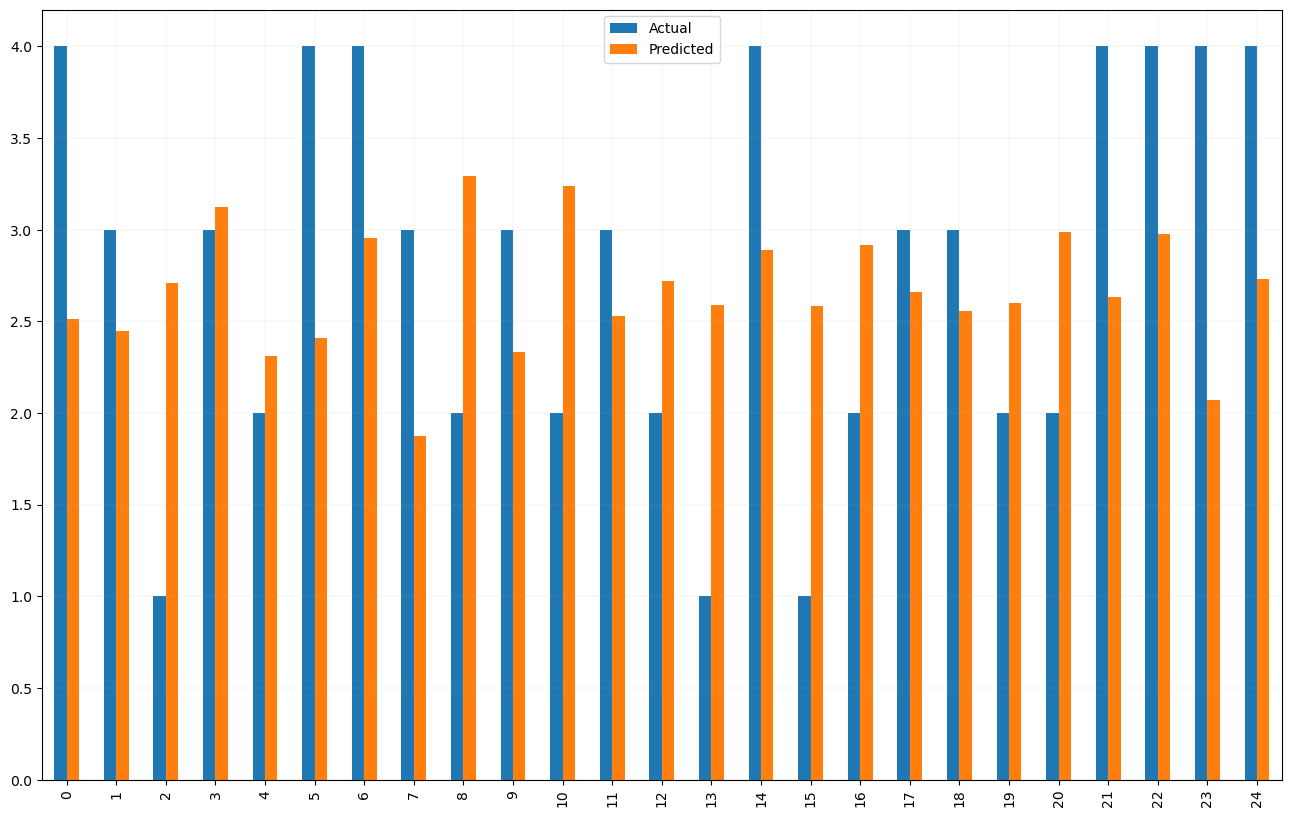

In [127]:
df_xgb = pd.DataFrame({'Actual': y_test.to_numpy().flatten(), 'Predicted': y_pred_xgb.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [128]:
from sklearn.metrics import mean_squared_error,mean_absolute_error ,r2_score

MSE_XGB=mean_squared_error(y_test, y_pred_xgb)
print("MSE: ", mean_squared_error(y_test, y_pred_xgb))


RMSE_XGB=np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


MAE_XGB=np.sqrt(mean_absolute_error(y_test, y_pred_xgb))
print("MAE: ", np.sqrt(mean_absolute_error(y_test, y_pred_xgb)))
       
R2_XGB=r2_score(y_test, y_pred_xgb)
print("R2 Score: ", r2_score(y_test, y_pred_xgb))

MSE:  1.3203690818864167
RMSE:  1.1490731403554852
MAE:  0.9975732093260532
R2 Score:  -0.1257067326504684


with PCA

In [129]:
XGB.fit(X_pca_train,y_pca_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

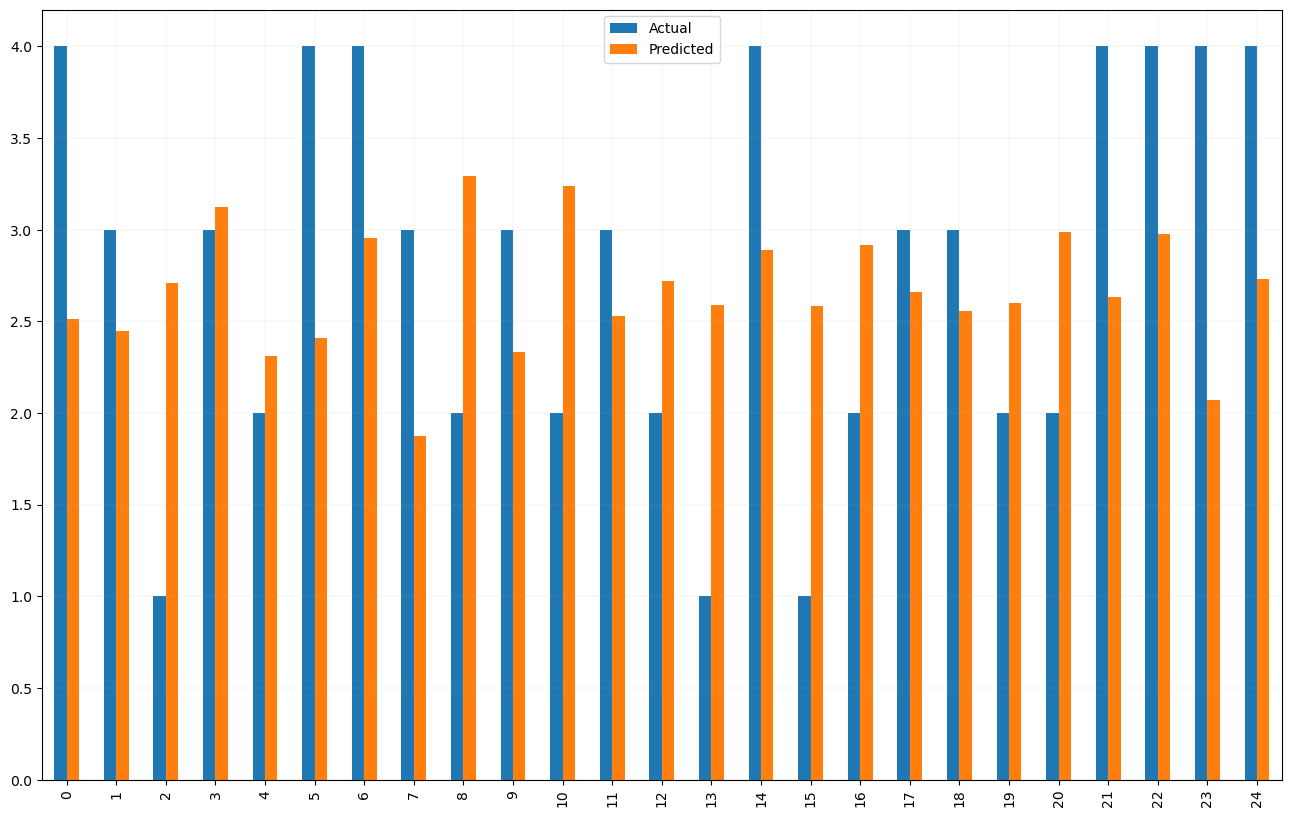

In [131]:
y_pca_pred_xgb = XGB.predict(X_pca_test)

df_xgb_pca = pd.DataFrame({'Actual': y_pca_test.to_numpy().flatten(), 'Predicted': y_pca_pred_xgb.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [132]:
MSE_XGB_pca=mean_squared_error(y_pca_test, y_pca_pred_xgb)
print("MSE: ", mean_squared_error(y_pca_test, y_pca_pred_xgb))


RMSE_XGB_pca=np.sqrt(mean_squared_error(y_pca_test, y_pca_pred_xgb))
print("RMSE: ", np.sqrt(mean_squared_error(y_pca_test, y_pca_pred_xgb)))


MAE_XGB_pca=np.sqrt(mean_absolute_error(y_pca_test, y_pca_pred_xgb))
print("MAE: ", np.sqrt(mean_absolute_error(y_pca_test, y_pca_pred_xgb)))
       
R2_XGB_pca=r2_score(y_pca_test, y_pca_pred_xgb)
print("R2 Score: ", r2_score(y_pca_test, y_pca_pred_xgb))

MSE:  1.2996211106556774
RMSE:  1.140009259021907
MAE:  0.97162635407249
R2 Score:  -0.10801764009014247


with LDA

In [133]:
XGB.fit(X_pca_train,y_pca_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

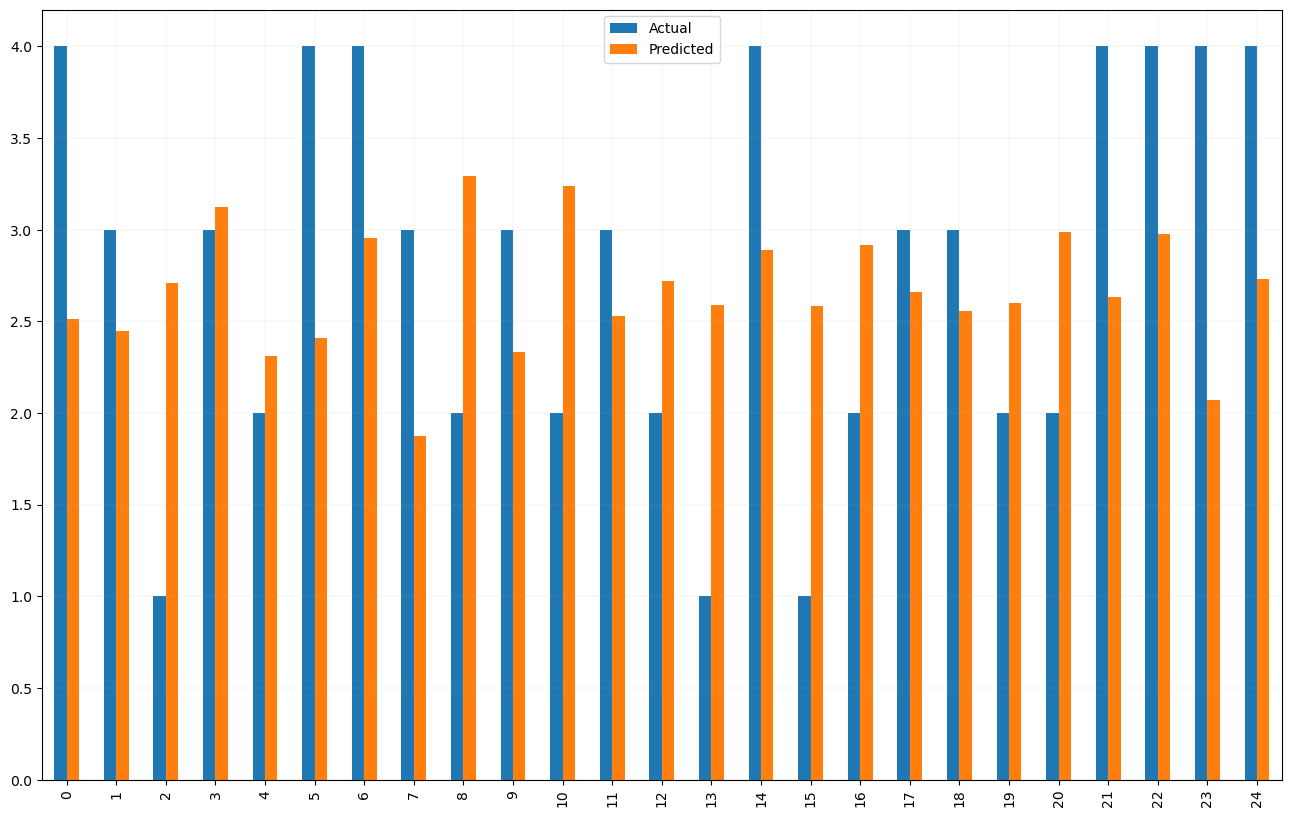

In [134]:
y_lda_pred_xgb = XGB.predict(X_lda_test)

df_xgb_lda = pd.DataFrame({'Actual': y_lda_test.to_numpy().flatten(), 'Predicted': y_lda_pred_xgb.flatten()})
df1 = df_xgb.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.1')
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

In [135]:
MSE_XGB_lda=mean_squared_error(y_lda_test, y_lda_pred_xgb)
print("MSE: ", mean_squared_error(y_lda_test, y_lda_pred_xgb))


RMSE_XGB_lda=np.sqrt(mean_squared_error(y_lda_test, y_lda_pred_xgb))
print("RMSE: ", np.sqrt(mean_squared_error(y_lda_test, y_lda_pred_xgb)))


MAE_XGB_lda=np.sqrt(mean_absolute_error(y_lda_test, y_lda_pred_xgb))
print("MAE: ", np.sqrt(mean_absolute_error(y_lda_test, y_lda_pred_xgb)))
       
R2_XGB_lda=r2_score(y_lda_test, y_lda_pred_xgb)
print("R2 Score: ", r2_score(y_lda_test, y_lda_pred_xgb))

MSE:  1.7576532540897312
RMSE:  1.3257651579709475
MAE:  1.0266828473462632
R2 Score:  -0.4985219882360299


##### Model Comparison

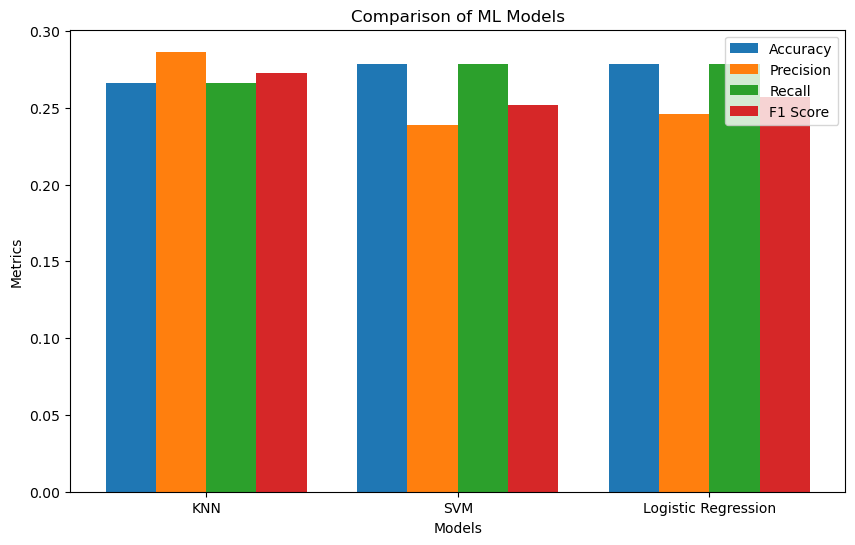

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [knn_model, svm_model, log_reg]
model_names = ['KNN', 'SVM', 'Logistic Regression']

accuracies = []
precisions = []
recalls = []
f1_scores = [] 
metrics = []

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(models))

bar1 = ax.bar(index, accuracies, width=bar_width, label='Accuracy')
bar2 = ax.bar(index + bar_width, precisions, width=bar_width, label='Precision')
bar3 = ax.bar(index + 2 * bar_width, recalls, width=bar_width, label='Recall')
bar4 = ax.bar(index + 3 * bar_width, f1_scores, width=bar_width, label='F1 Score')

ax.set_xlabel('Models')
ax.set_ylabel('Metrics')
ax.set_title('Comparison of ML Models')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()